# Trabajo Práctico Final - Visualización de la Información 2024 UTN

**Alumna:** Aylin Agatha Vazquez Chenlo

---

Importo las librerías que voy a utilizar:

In [132]:
import os
import re
import yasa
import mne
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
import plotly.express as px

Leo los archivos CSV que voy a analizar:

In [2]:
df_min = pd.read_csv(r'data/characteristics_timelocked2min.csv')
df_min.head(5)

,Unnamed: 0,power_SO,power_SO_relative,power_delta,power_delta_relative,power_sigma,power_sigma_relative,maxi,idx_maxi,mini,idx_mini,slope_positive,second_maxi,idx_second_maxi,slope_negative,num_of_zc_min_max,num_of_zc_max_min,kurtosis,skewness,KC
0,0,16.838,0.047,208.257,0.585,21.876,0.061,28.450,222,-57.279,199,3.727,7.467,167,-2.023,1,1,0.880,-0.957,yes
1,1,12.370,0.042,219.871,0.750,19.369,0.066,43.573,249,-44.359,199,1.759,9.632,166,-1.636,1,1,2.559,-0.581,yes
2,2,22.325,0.045,350.527,0.701,16.623,0.033,40.637,220,-51.521,199,4.388,18.047,149,-1.391,1,1,0.593,-0.569,yes
3,3,66.455,0.116,267.932,0.469,13.428,0.024,50.689,229,-38.597,199,2.976,33.281,177,-3.267,1,1,-0.018,0.333,yes
4,4,6.250,0.009,526.267,0.786,37.559,0.056,44.623,224,-78.589,199,4.928,21.303,159,-2.497,1,1,2.115,-0.747,yes


In [3]:
df_center = pd.read_csv(r'data/characteristics_timelocked2center.csv')
df_center.head(5)

,Unnamed: 0,power_SO,power_SO_relative,power_delta,power_delta_relative,power_sigma,power_sigma_relative,maxi,idx_maxi,mini,idx_mini,slope_positive,second_maxi,idx_second_maxi,slope_negative,num_of_zc_min_max,num_of_zc_max_min,kurtosis,skewness,KC
0,0,13.212,0.037,214.755,0.598,19.759,0.055,28.450,211,-58.410,189,3.948,7.467,156,-1.996,1,1,0.958,-0.955,yes
1,1,12.343,0.040,234.437,0.756,21.545,0.069,43.593,225,-46.397,175,1.800,9.632,141,-1.648,1,1,2.708,-0.651,yes
2,2,21.055,0.042,346.471,0.694,18.549,0.037,40.637,210,-52.554,190,4.660,17.861,141,-1.437,1,1,0.634,-0.541,yes
3,3,79.289,0.138,270.497,0.471,12.164,0.021,50.689,215,-38.902,186,3.089,33.281,163,-3.138,1,1,-0.015,0.319,yes
4,4,5.538,0.008,525.288,0.789,36.334,0.055,44.623,212,-82.995,188,5.317,21.303,147,-2.544,1,1,1.890,-0.675,yes


Lo primero que observo es que hay una columna de máz al inicio llamada "Unnamed:0" que voy a borrar:

In [4]:
del df_min['Unnamed: 0']
del df_center['Unnamed: 0']

Ambos dataframes tienen las mismas columnas:

In [5]:
df_min.columns

Index(['power_SO', 'power_SO_relative', 'power_delta', 'power_delta_relative',
       'power_sigma', 'power_sigma_relative', 'maxi', 'idx_maxi', 'mini',
       'idx_mini', 'slope_positive', 'second_maxi', 'idx_second_maxi',
       'slope_negative', 'num_of_zc_min_max', 'num_of_zc_max_min', 'kurtosis',
       'skewness', 'KC'],
      dtype='object')

## Datos time locked al medio entre el mínimo y máximo absoluto

In [6]:
df = df_center.copy()

### Análisis de potencias según KC o no KC

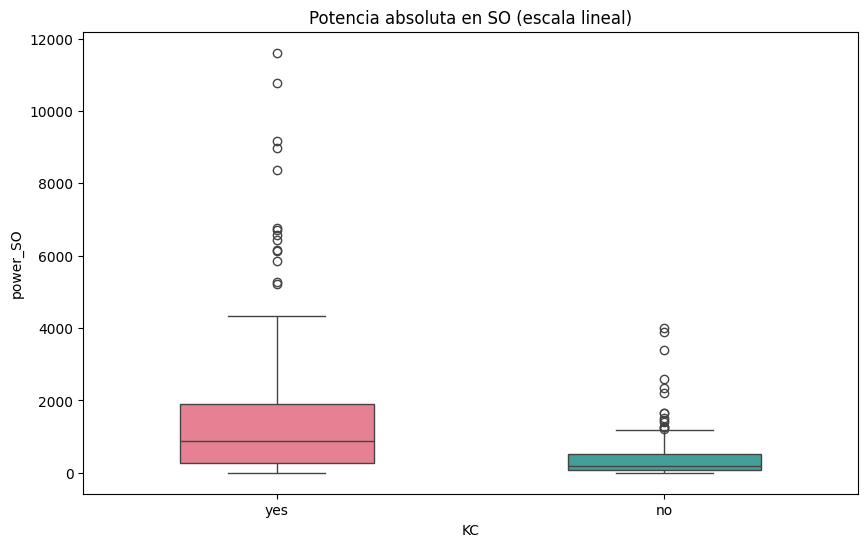

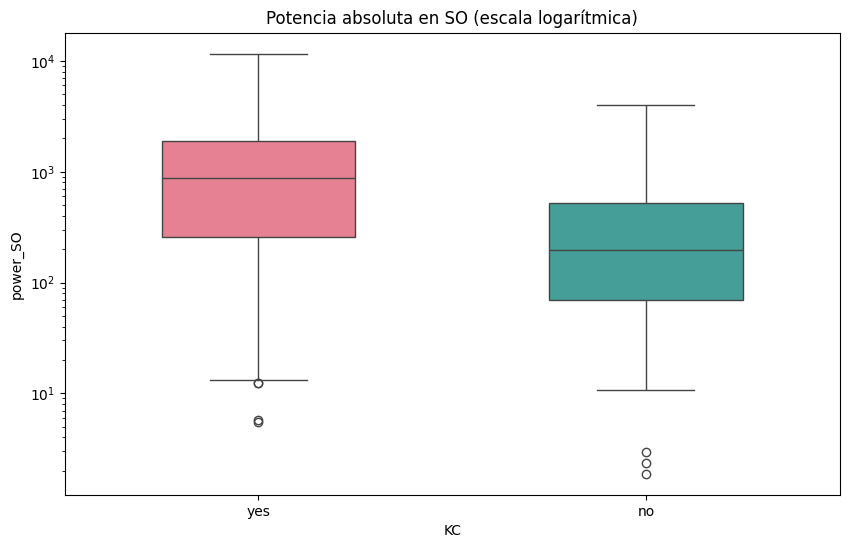

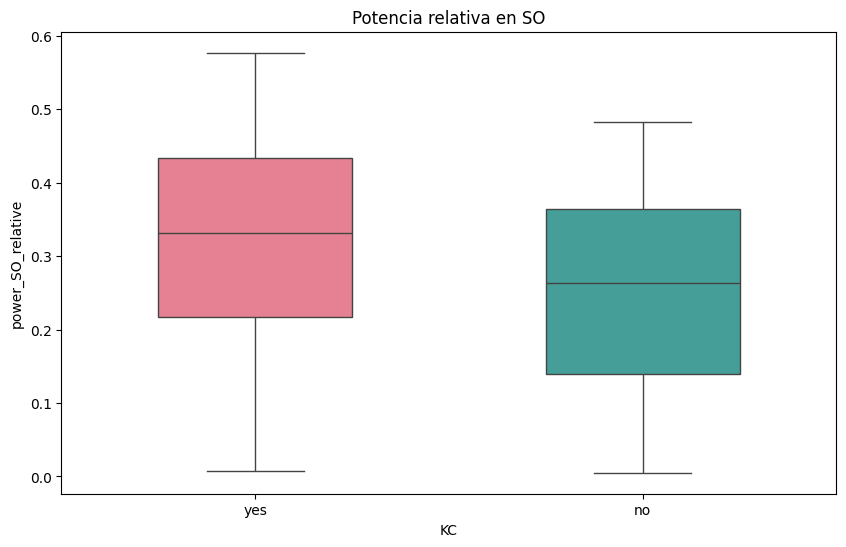

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_SO', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia absoluta en SO (escala lineal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_SO', hue='KC', x='KC', palette='husl', width=0.5, log_scale=True)
plt.title('Potencia absoluta en SO (escala logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_SO_relative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia relativa en SO')
plt.show()

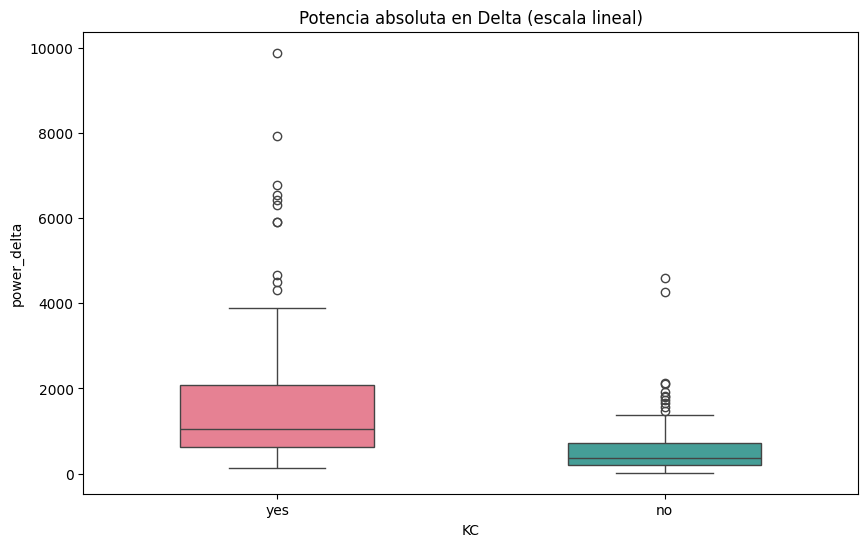

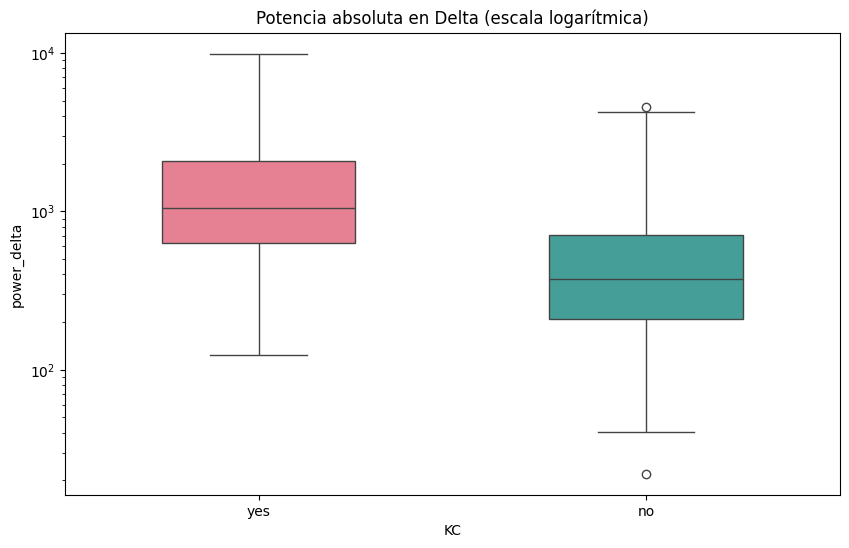

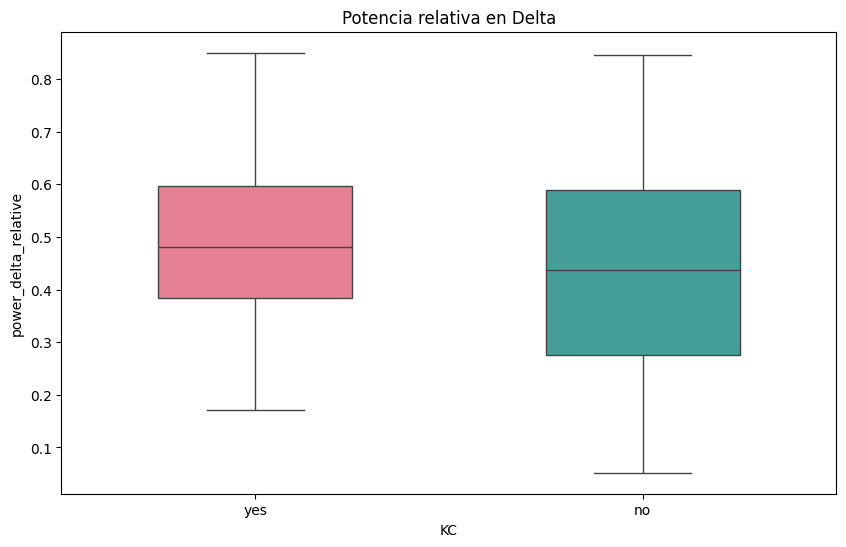

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_delta', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia absoluta en Delta (escala lineal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_delta', hue='KC', x='KC', palette='husl', width=0.5, log_scale=True)
plt.title('Potencia absoluta en Delta (escala logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_delta_relative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia relativa en Delta')
plt.show()

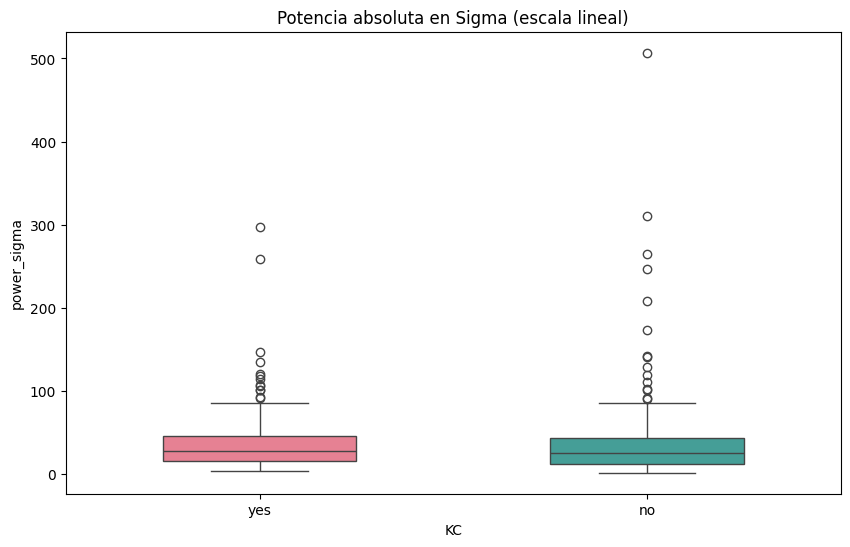

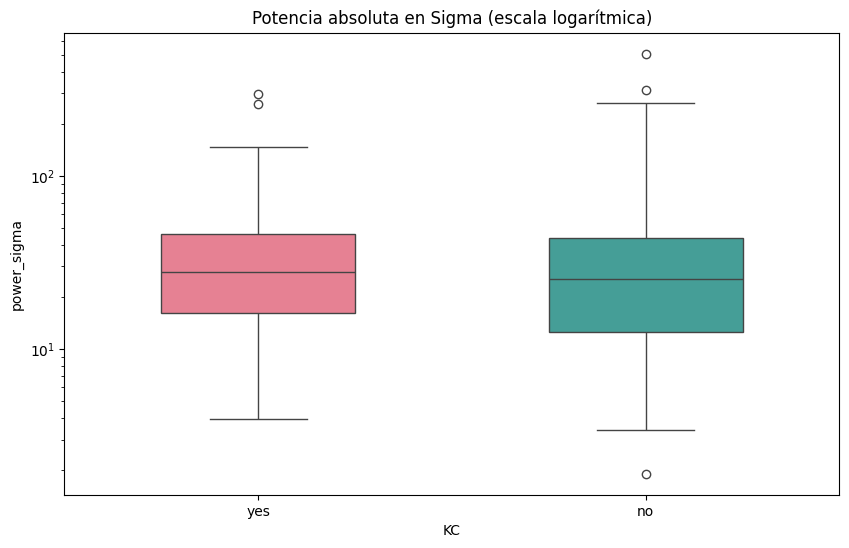

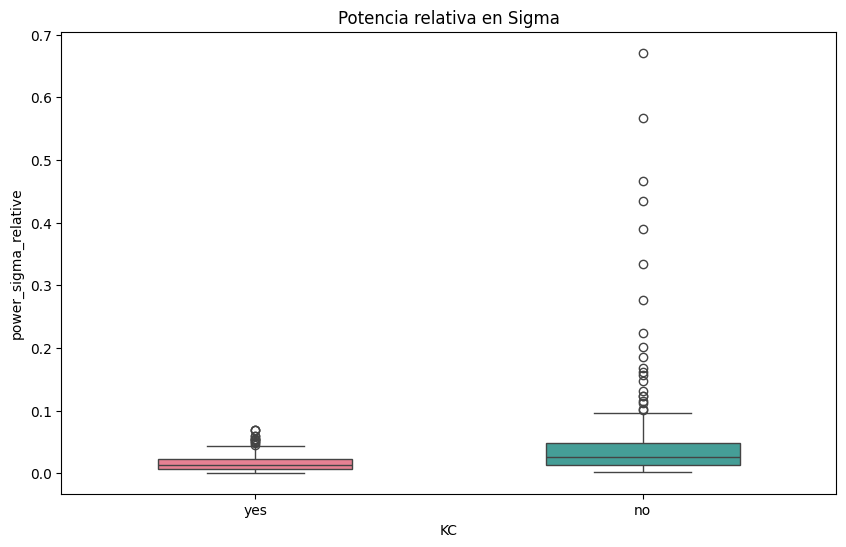

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_sigma', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia absoluta en Sigma (escala lineal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_sigma', hue='KC', x='KC', palette='husl', width=0.5, log_scale=True)
plt.title('Potencia absoluta en Sigma (escala logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_sigma_relative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia relativa en Sigma')
plt.show()

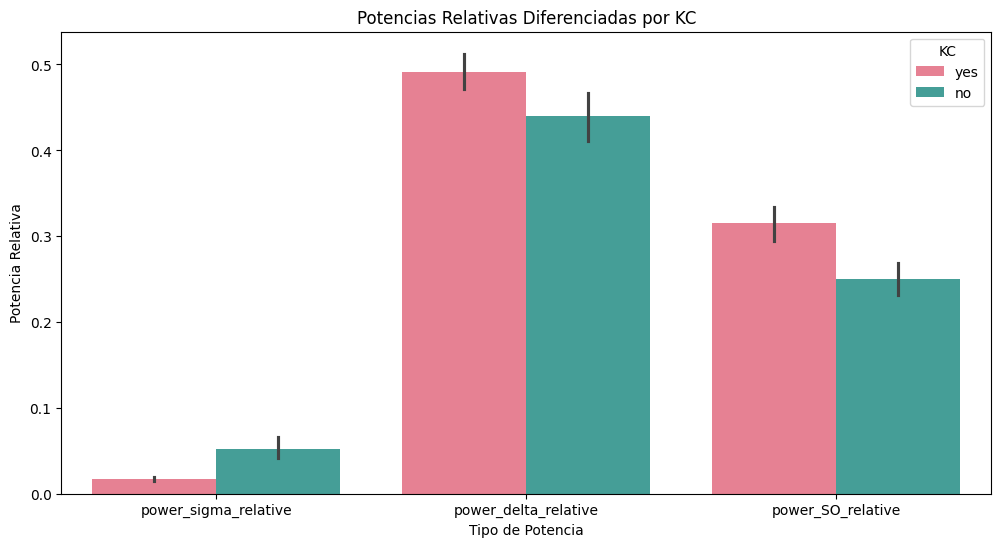

In [10]:
df_melted = df.melt(id_vars=['KC'], value_vars=['power_sigma_relative', 'power_delta_relative', 'power_SO_relative'], 
                    var_name='Power Type', value_name='Relative Power')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Power Type', y='Relative Power', hue='KC', palette='husl')
plt.title('Potencias Relativas Diferenciadas por KC')
plt.xlabel('Tipo de Potencia')
plt.ylabel('Potencia Relativa')
plt.legend(title='KC')
plt.show()

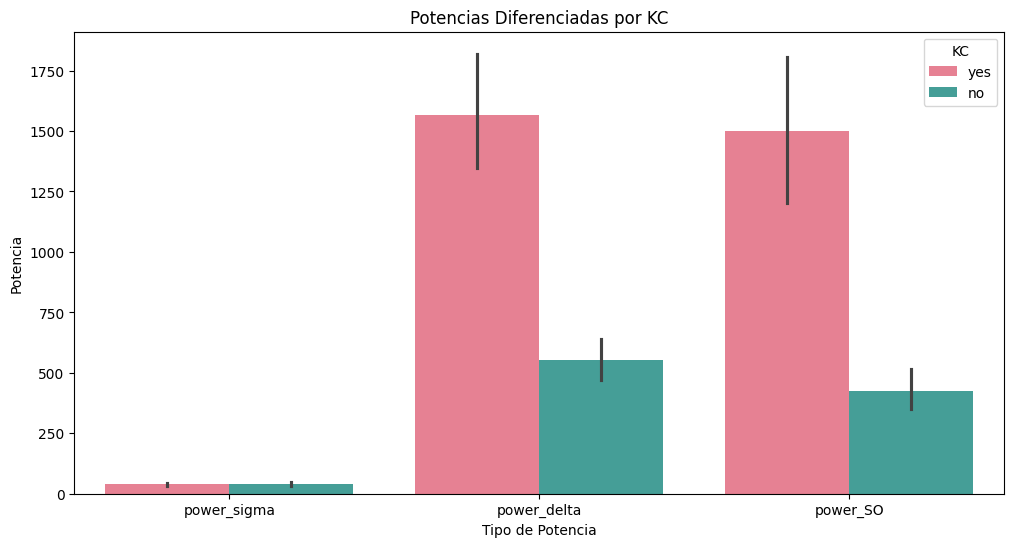

In [11]:
df_melted = df.melt(id_vars=['KC'], value_vars=['power_sigma', 'power_delta', 'power_SO'], 
                    var_name='Power Type', value_name='Power')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Power Type', y='Power', hue='KC', palette='husl')
plt.title('Potencias Diferenciadas por KC')
plt.xlabel('Tipo de Potencia')
plt.ylabel('Potencia')
plt.legend(title='KC')
plt.show()

<Figure size 1000x600 with 0 Axes>

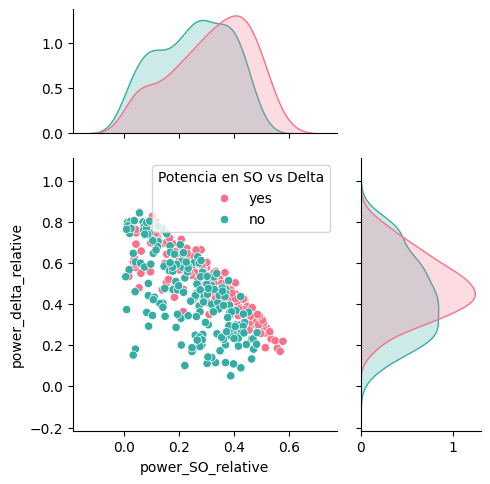

In [12]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df, x='power_SO_relative', y='power_delta_relative', hue='KC', palette='husl', height=5, ratio=2, marginal_ticks=True)
plt.legend(title='Potencia en SO vs Delta')
plt.show()

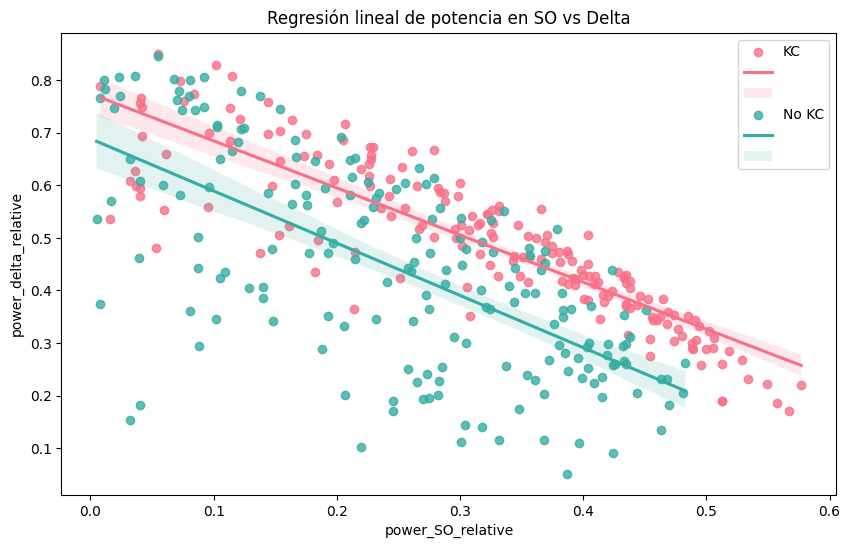

In [13]:
kc_color, nokc_color = sns.color_palette(palette='husl', n_colors=2)
plt.figure(figsize=(10,6))
sns.regplot(data=df[df['KC'] == 'yes'], x="power_SO_relative", y="power_delta_relative", color=kc_color, line_kws=dict(color=kc_color))
sns.regplot(data=df[df['KC'] == 'no'], x="power_SO_relative", y="power_delta_relative", color=nokc_color, line_kws=dict(color=nokc_color))
plt.legend(['KC', '', '', 'No KC', '', ''])
plt.title('Regresión lineal de potencia en SO vs Delta')
plt.show()

<Figure size 1000x600 with 0 Axes>

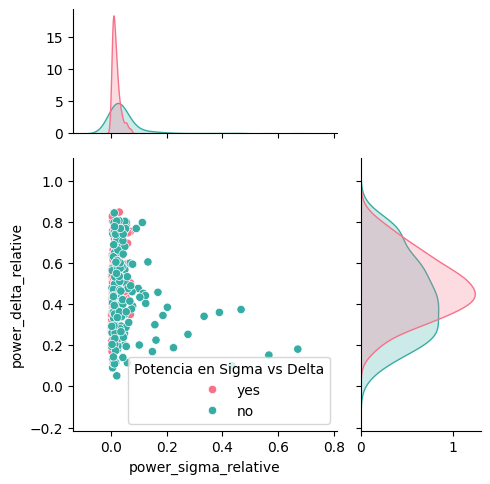

In [14]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='power_sigma_relative', y='power_delta_relative', hue='KC', palette='husl', height=5, ratio=2, marginal_ticks=True)
plt.legend(title='Potencia en Sigma vs Delta')
plt.show()

<Figure size 1000x600 with 0 Axes>

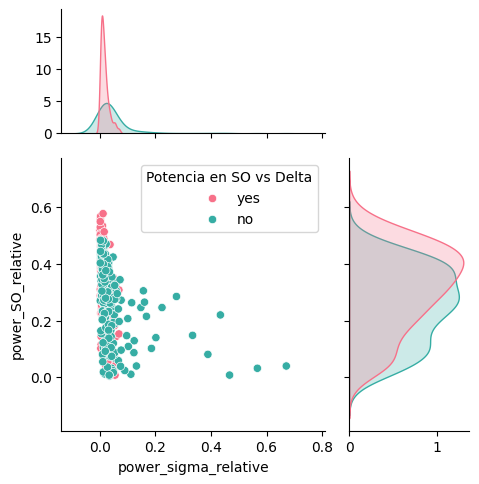

In [15]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='power_sigma_relative', y='power_SO_relative', hue='KC', palette='husl', height=5, ratio=2, marginal_ticks=True)
plt.legend(title='Potencia en SO vs Delta')
plt.show()

In [16]:
df.columns

Index(['power_SO', 'power_SO_relative', 'power_delta', 'power_delta_relative',
       'power_sigma', 'power_sigma_relative', 'maxi', 'idx_maxi', 'mini',
       'idx_mini', 'slope_positive', 'second_maxi', 'idx_second_maxi',
       'slope_negative', 'num_of_zc_min_max', 'num_of_zc_max_min', 'kurtosis',
       'skewness', 'KC'],
      dtype='object')

### Análisis de paramétros estadísticos (kurtosis y skewness)

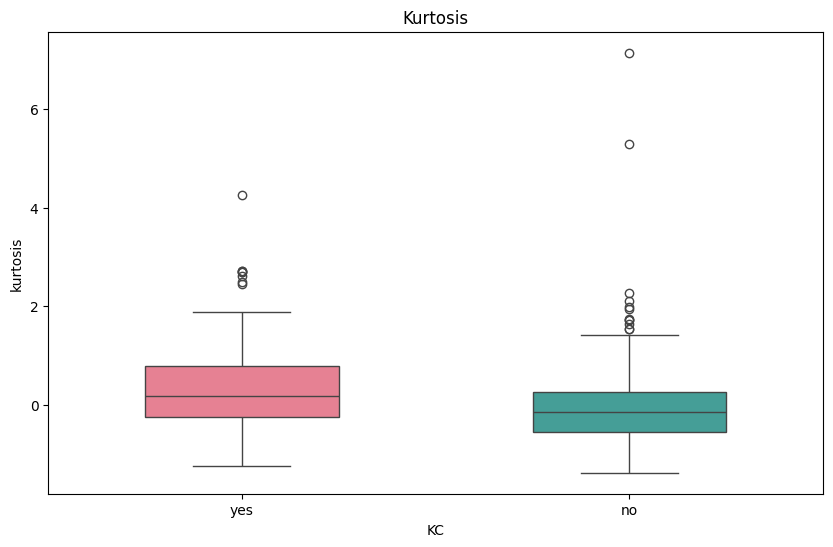

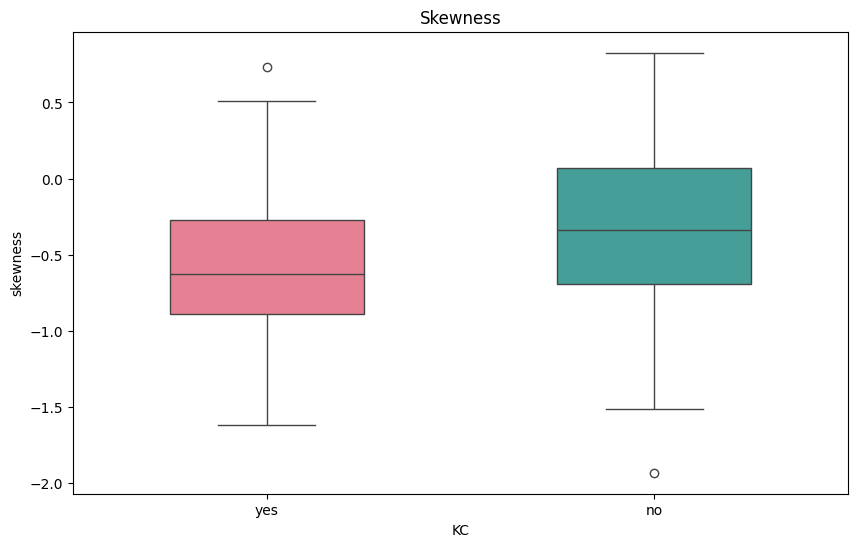

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='kurtosis', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Kurtosis')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='skewness', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Skewness')
plt.show()

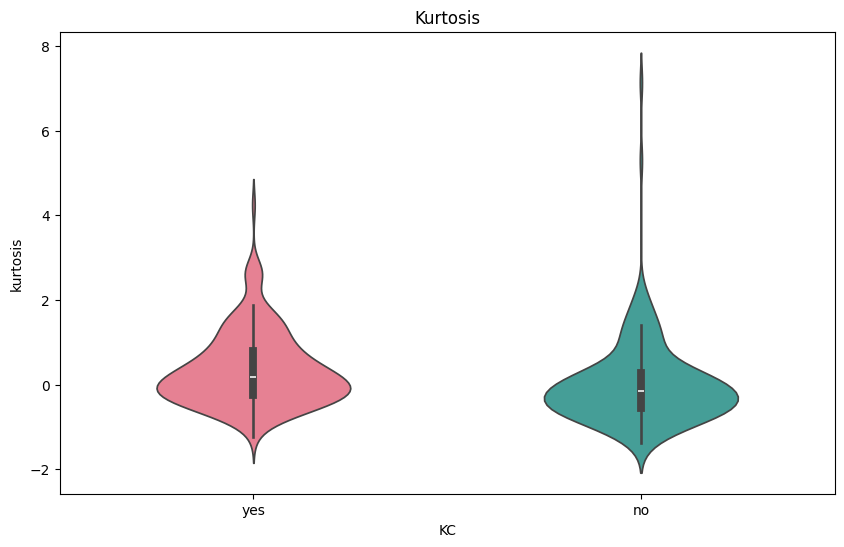

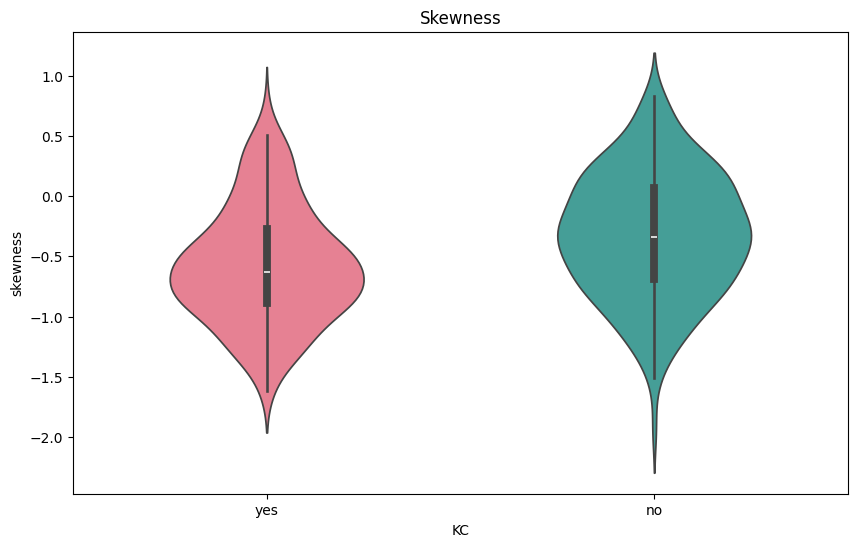

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='kurtosis', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Kurtosis')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='skewness', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Skewness')
plt.show()

### Análisis de características morfológicas del evento

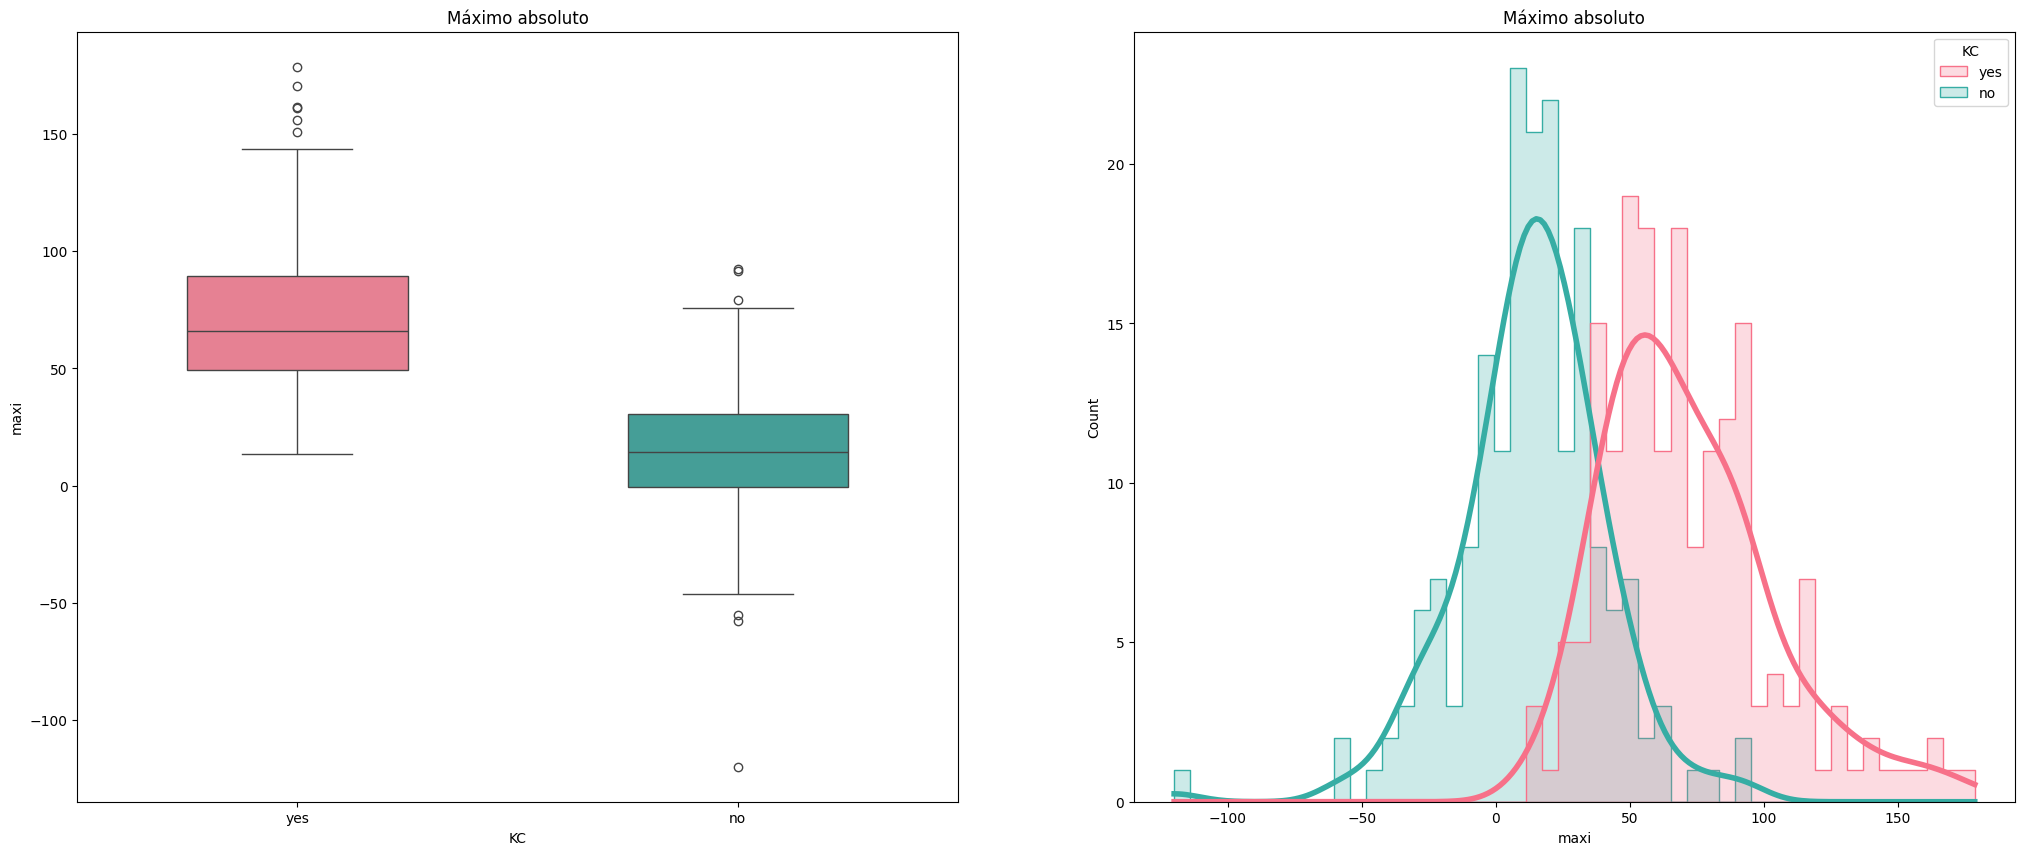

In [19]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Máximo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Máximo absoluto')
plt.show()

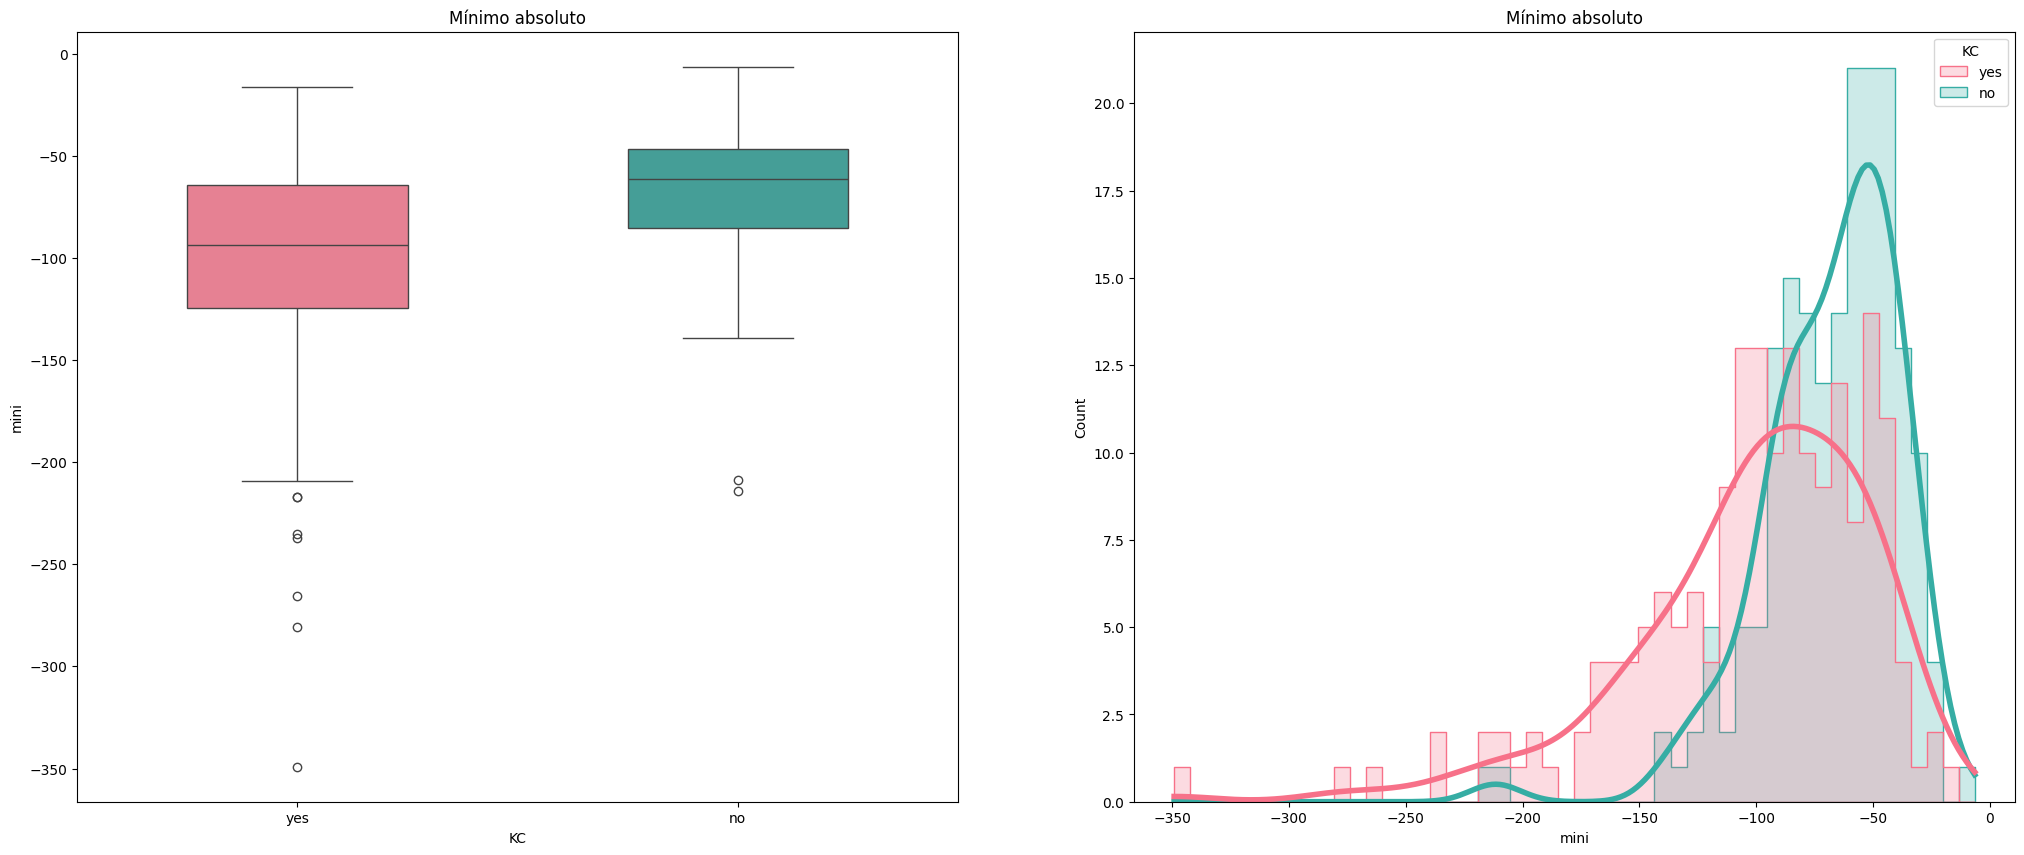

In [20]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='mini', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Mínimo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='mini', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Mínimo absoluto')
plt.show()

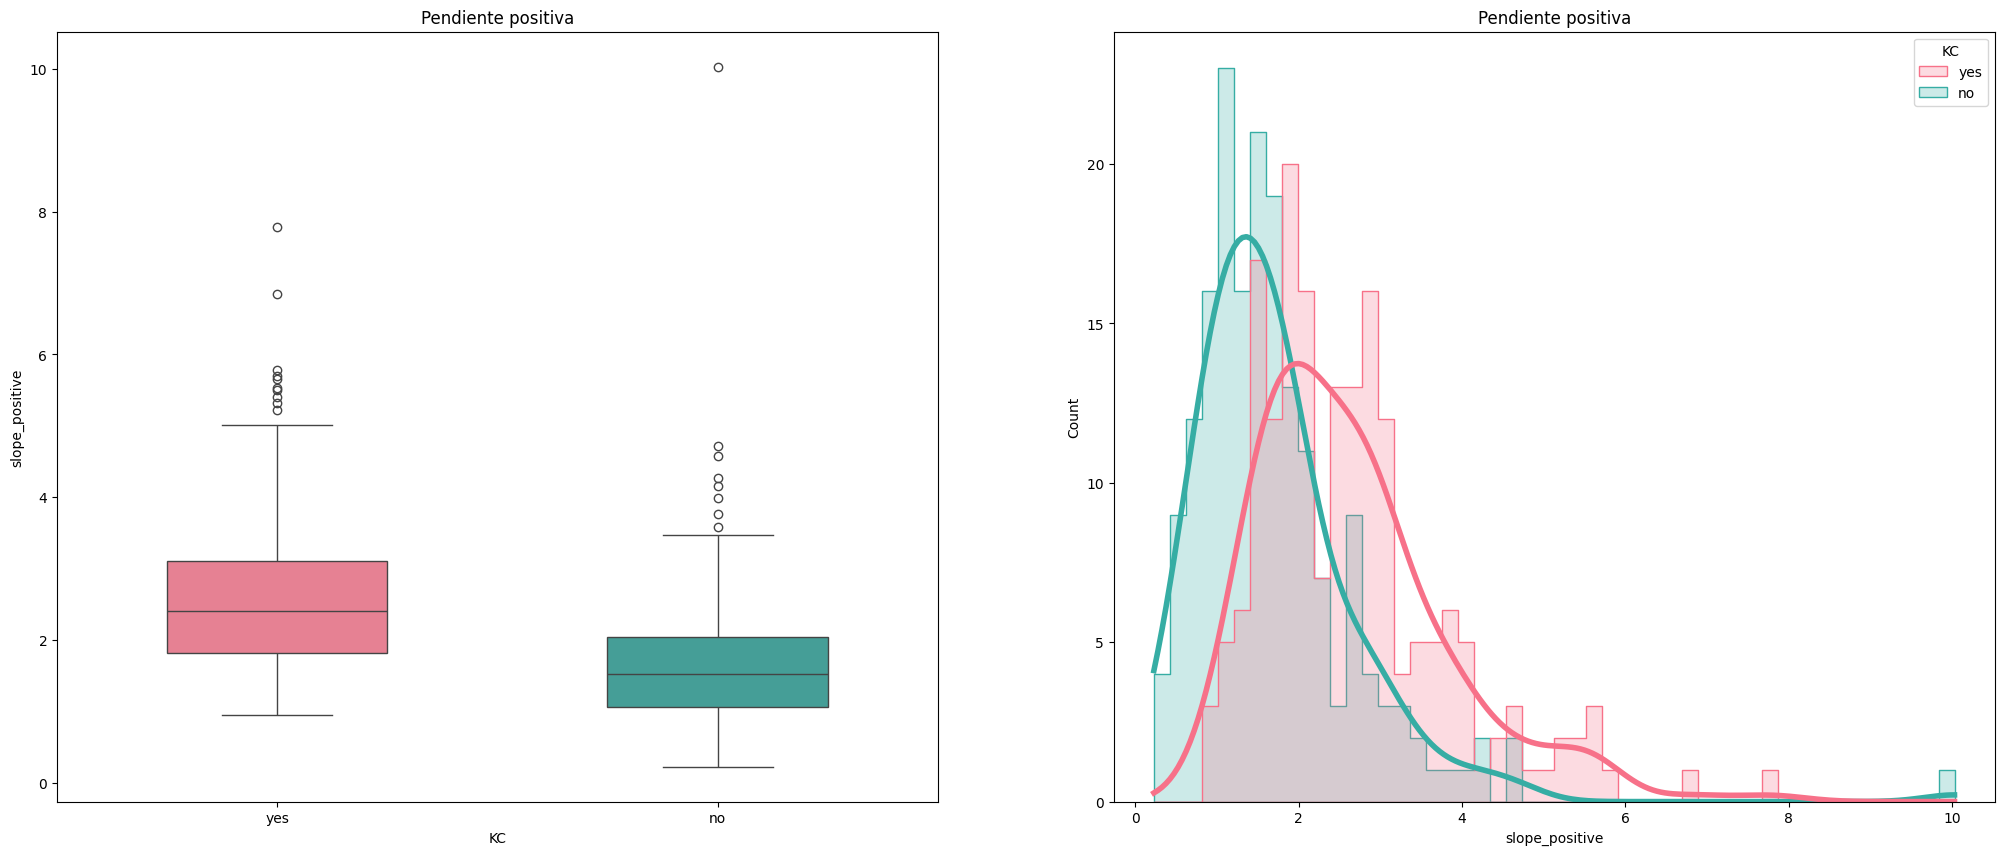

In [21]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='slope_positive', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Pendiente positiva')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='slope_positive', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Pendiente positiva')
plt.show()

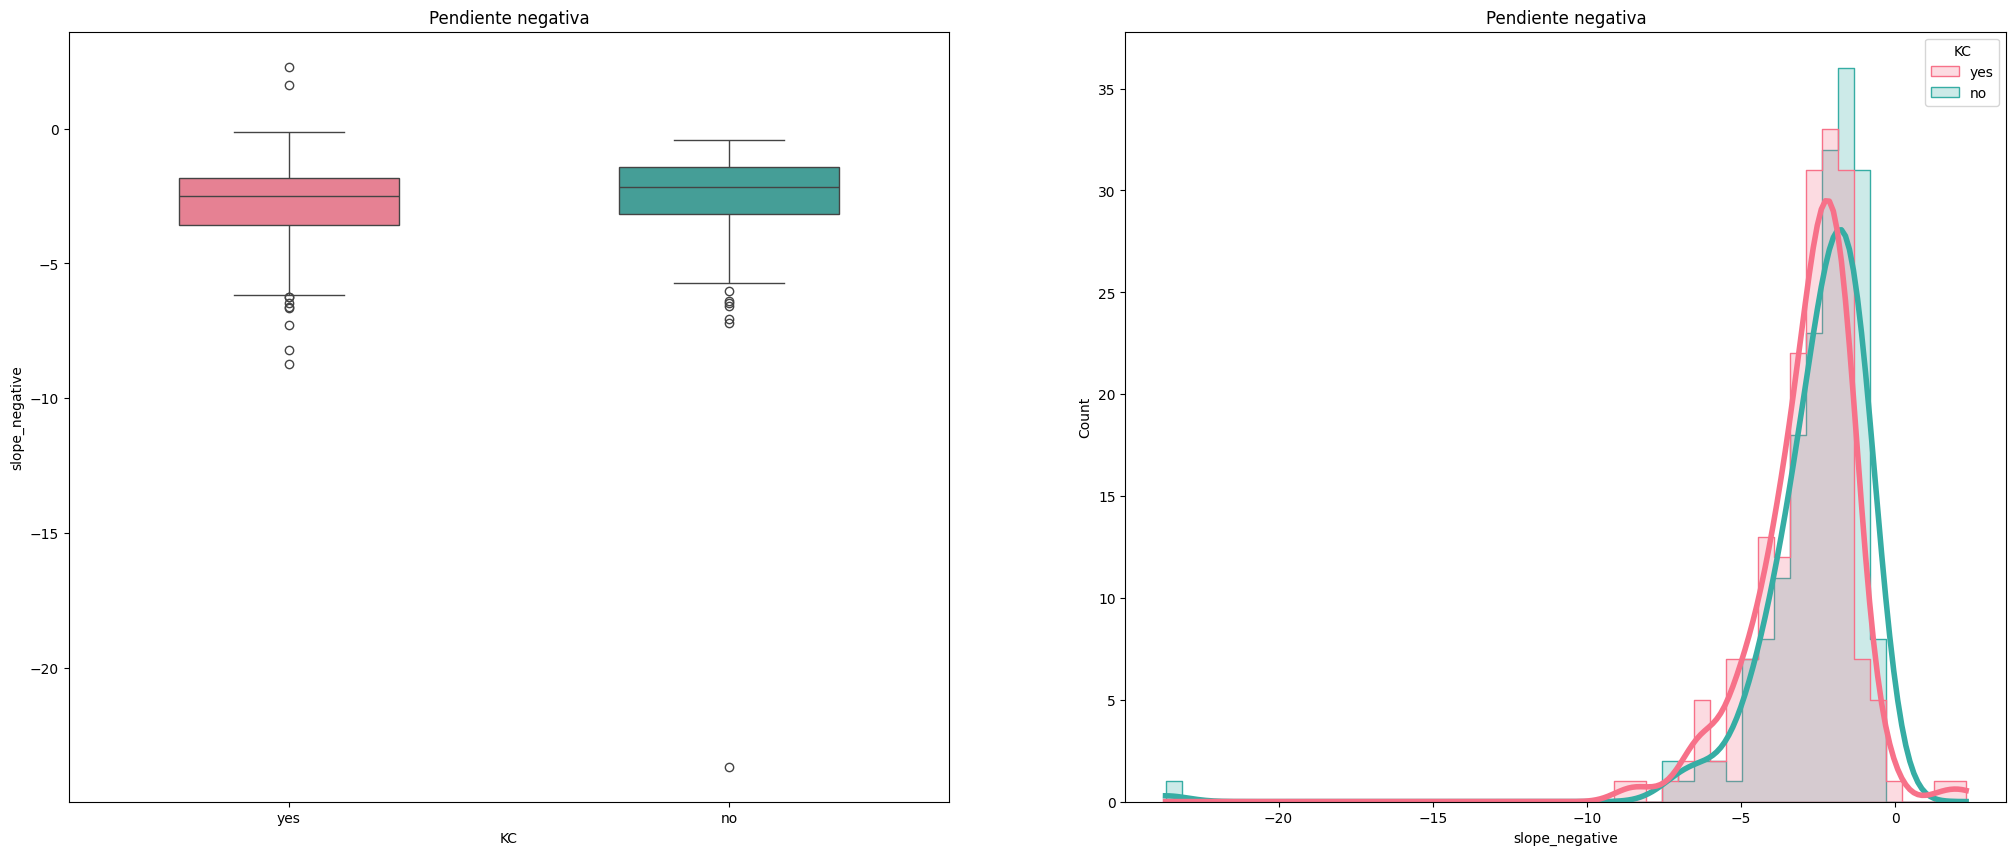

In [22]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='slope_negative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Pendiente negativa')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='slope_negative', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Pendiente negativa')
plt.show()

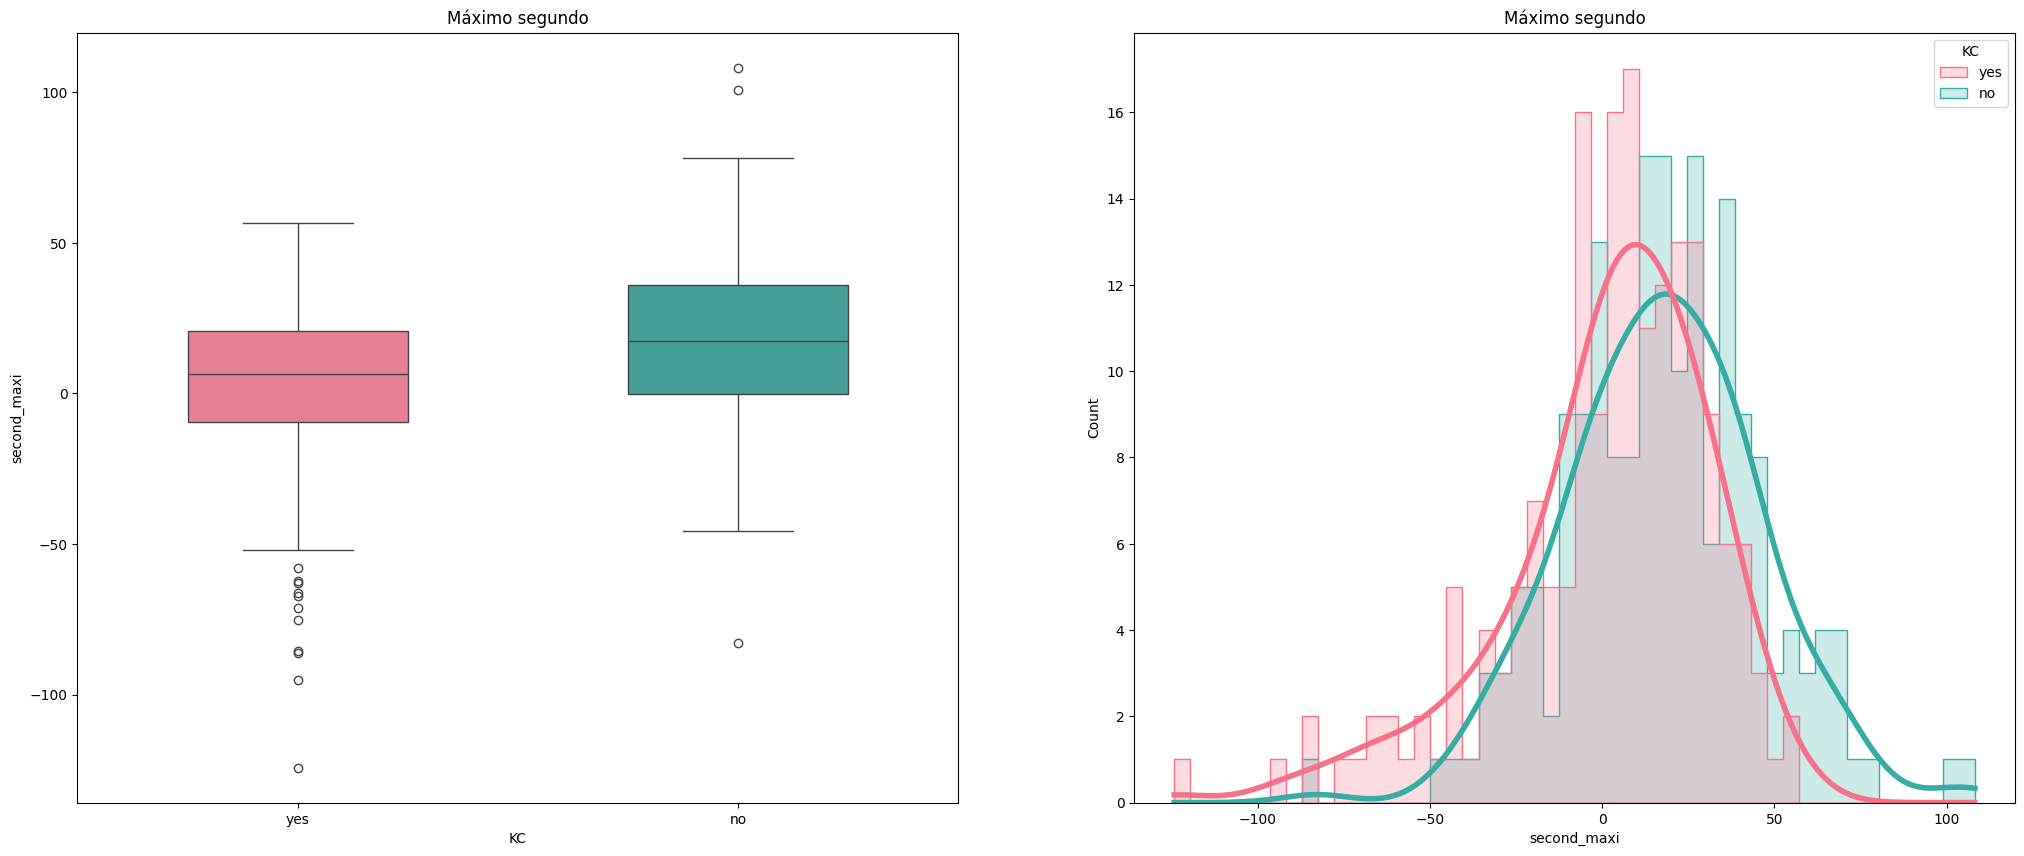

In [23]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='second_maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Máximo segundo')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='second_maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Máximo segundo')
plt.show()

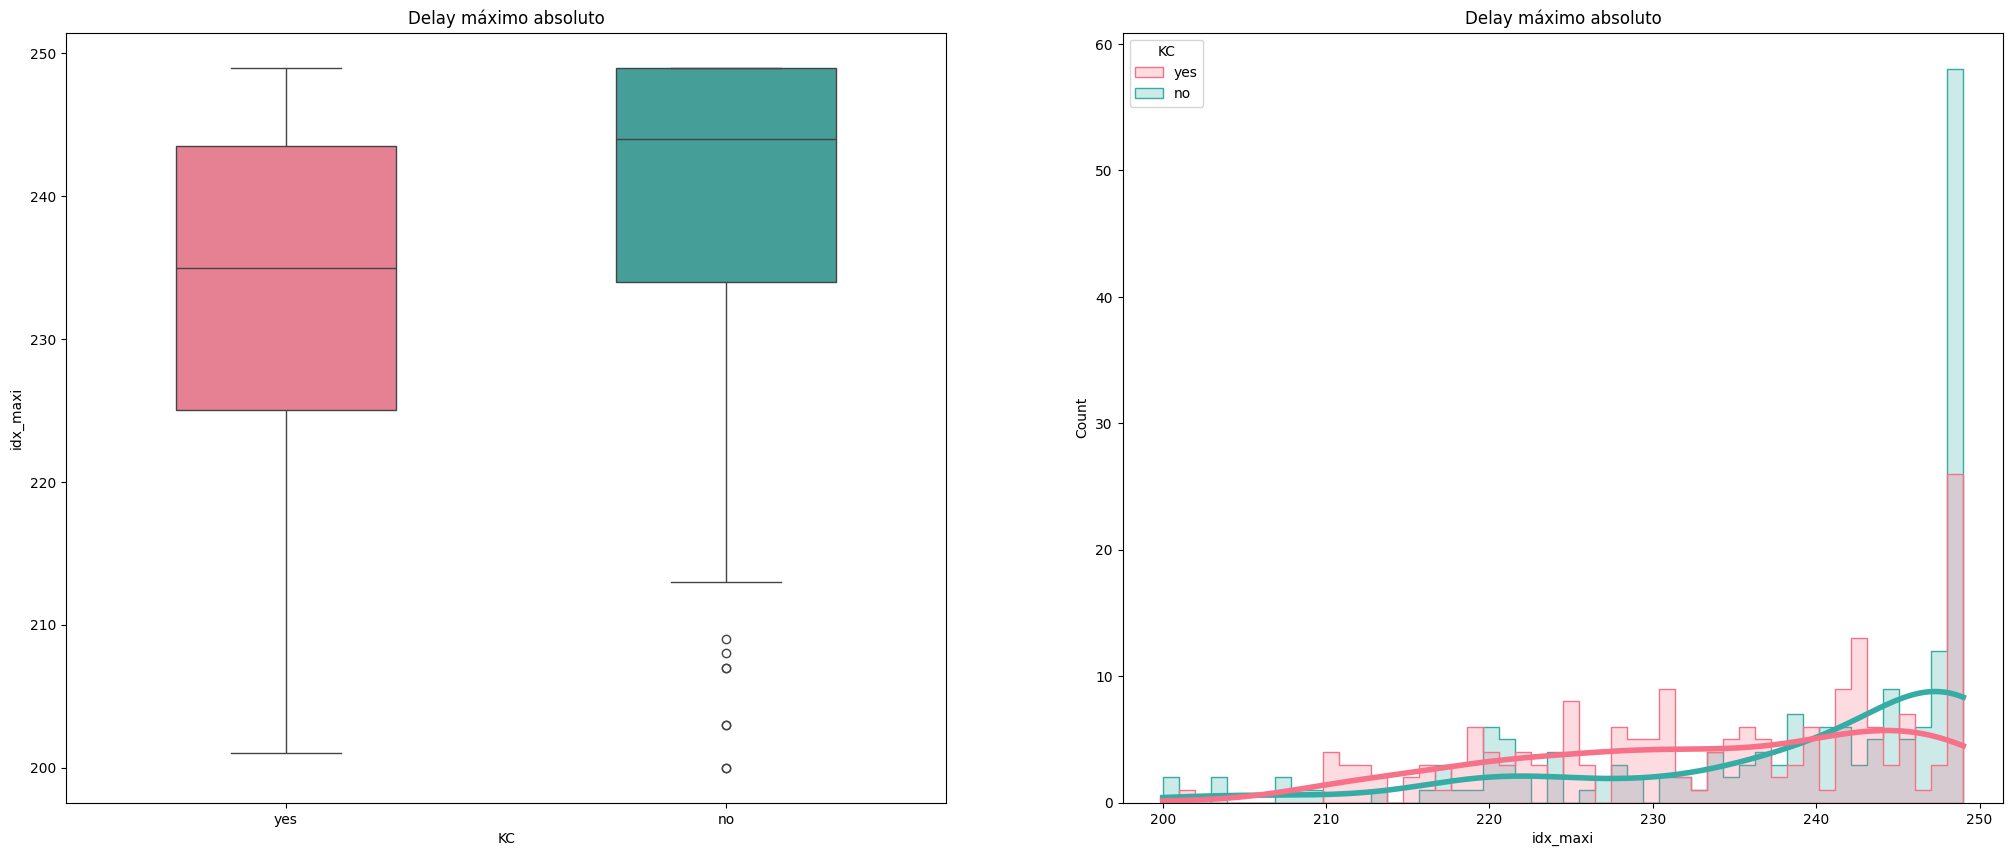

In [24]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='idx_maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Delay máximo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='idx_maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Delay máximo absoluto')
plt.show()

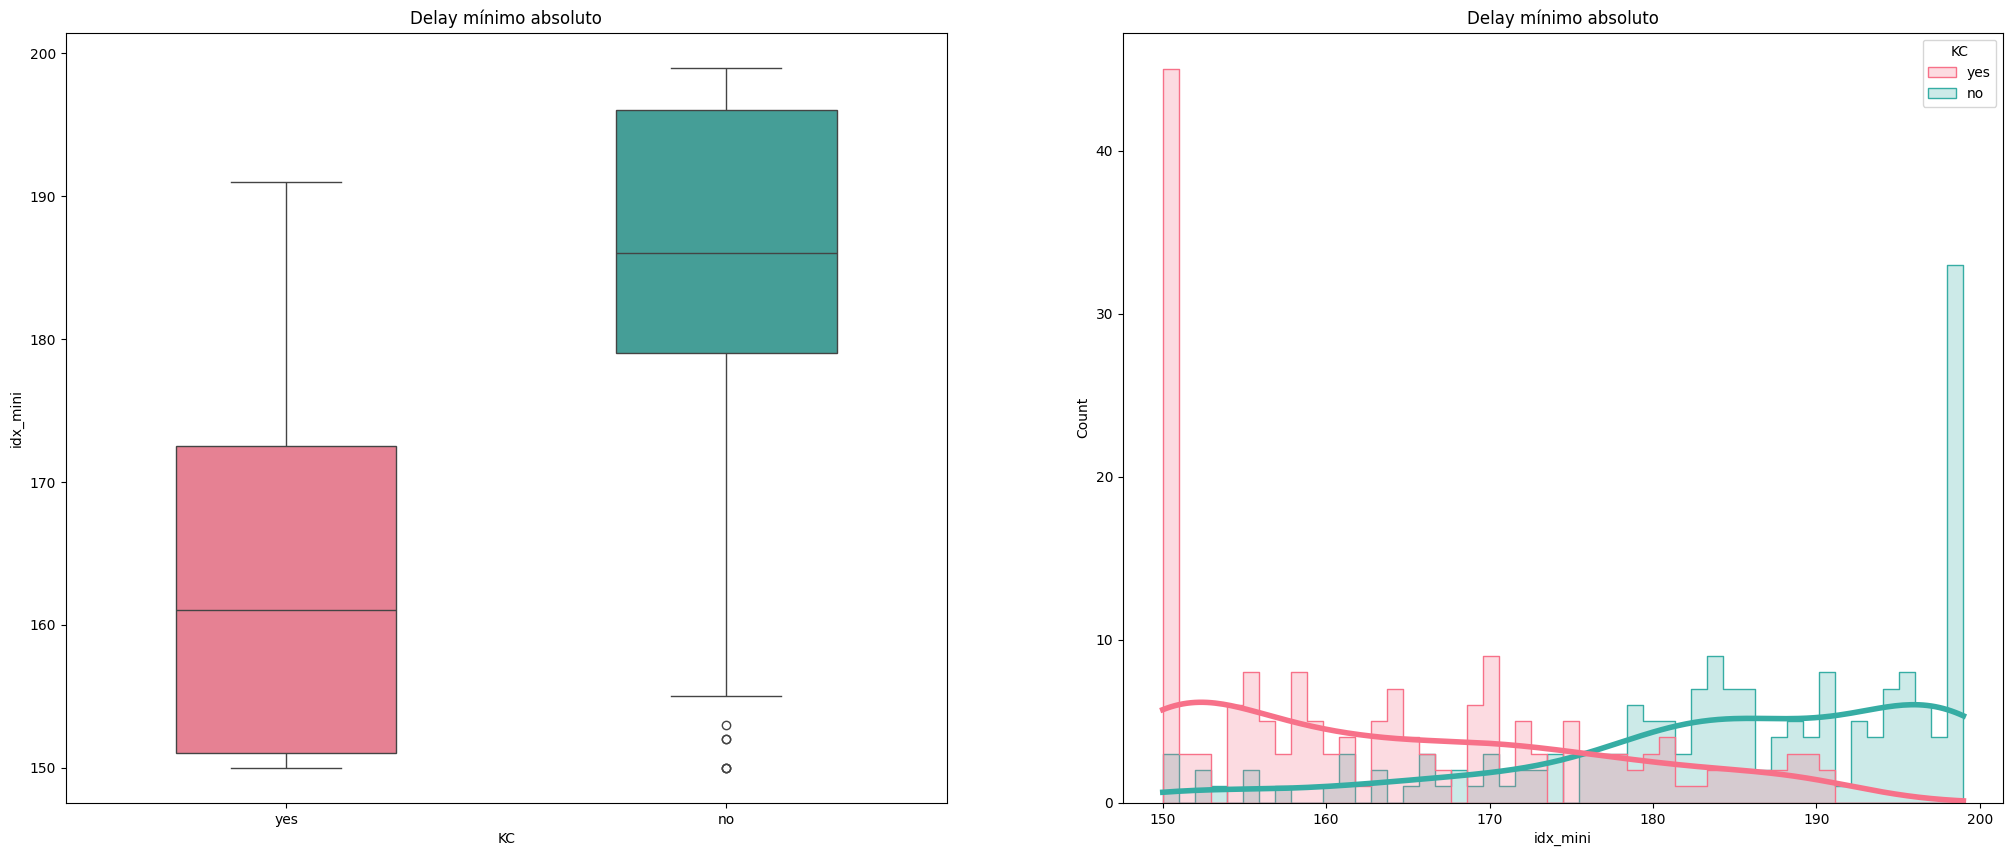

In [25]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='idx_mini', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Delay mínimo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='idx_mini', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Delay mínimo absoluto')
plt.show()

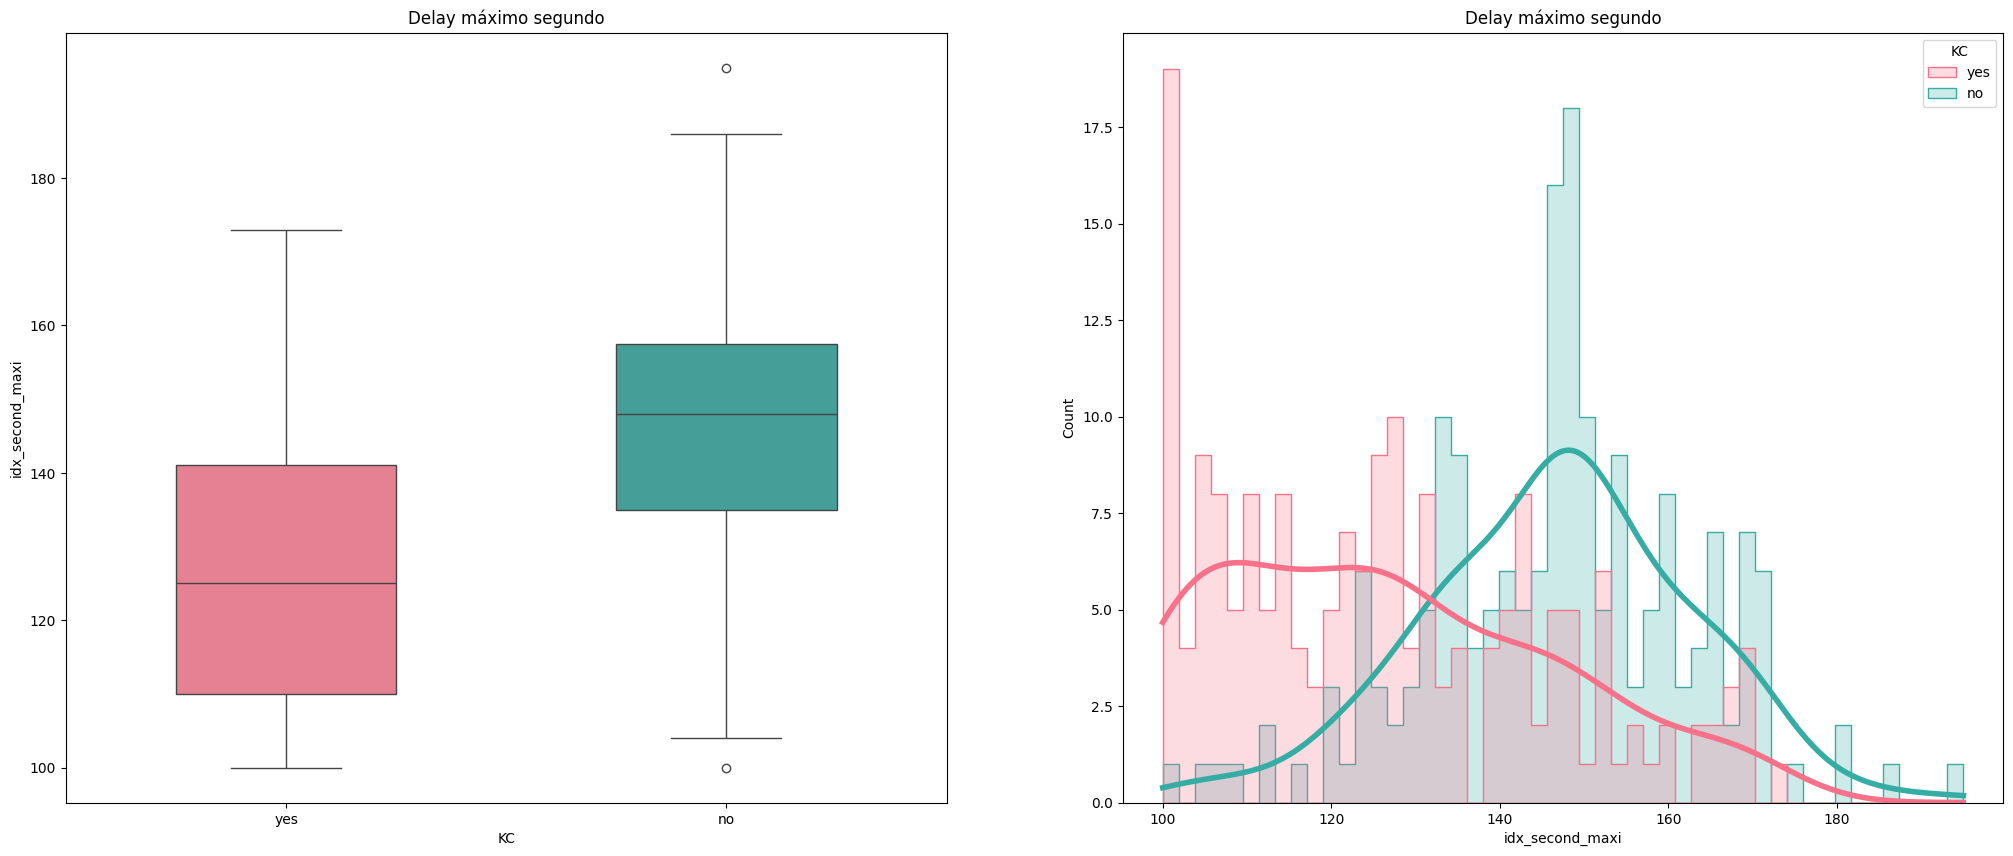

In [26]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='idx_second_maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Delay máximo segundo')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='idx_second_maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Delay máximo segundo')
plt.show()

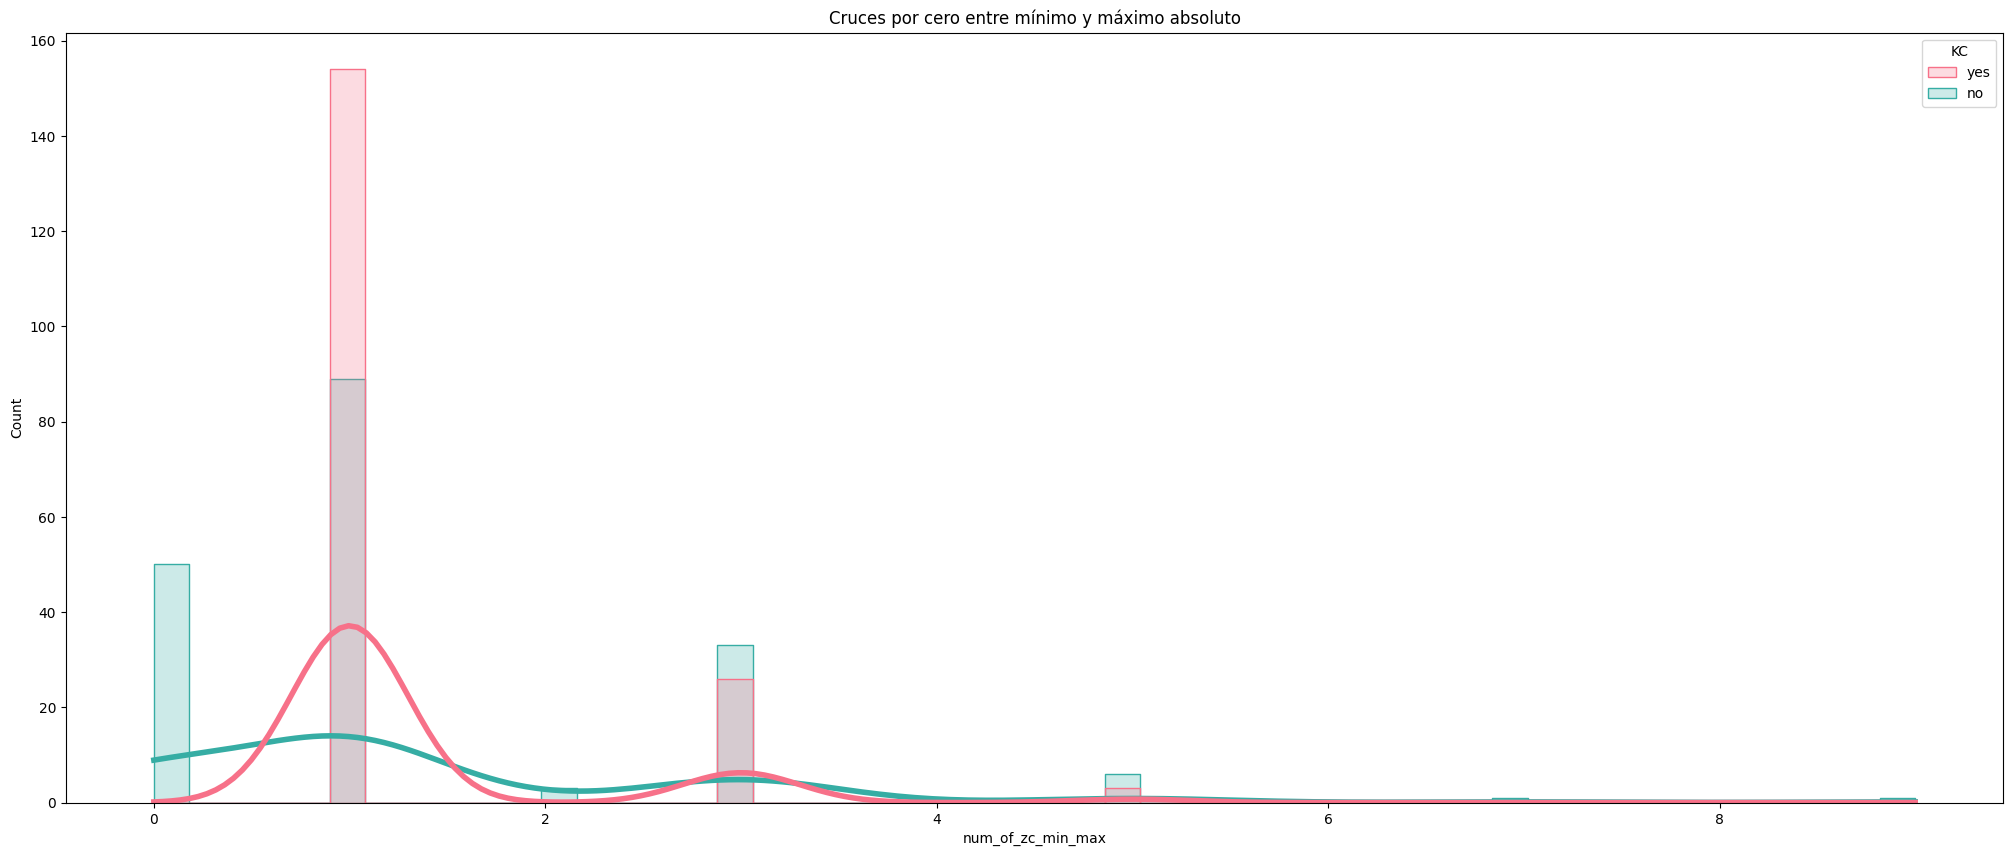

In [27]:
plt.figure(figsize=(25, 10))
sns.histplot(data=df, hue='KC', x='num_of_zc_min_max', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Cruces por cero entre mínimo y máximo absoluto')
plt.rc('legend',fontsize=10)
plt.show()

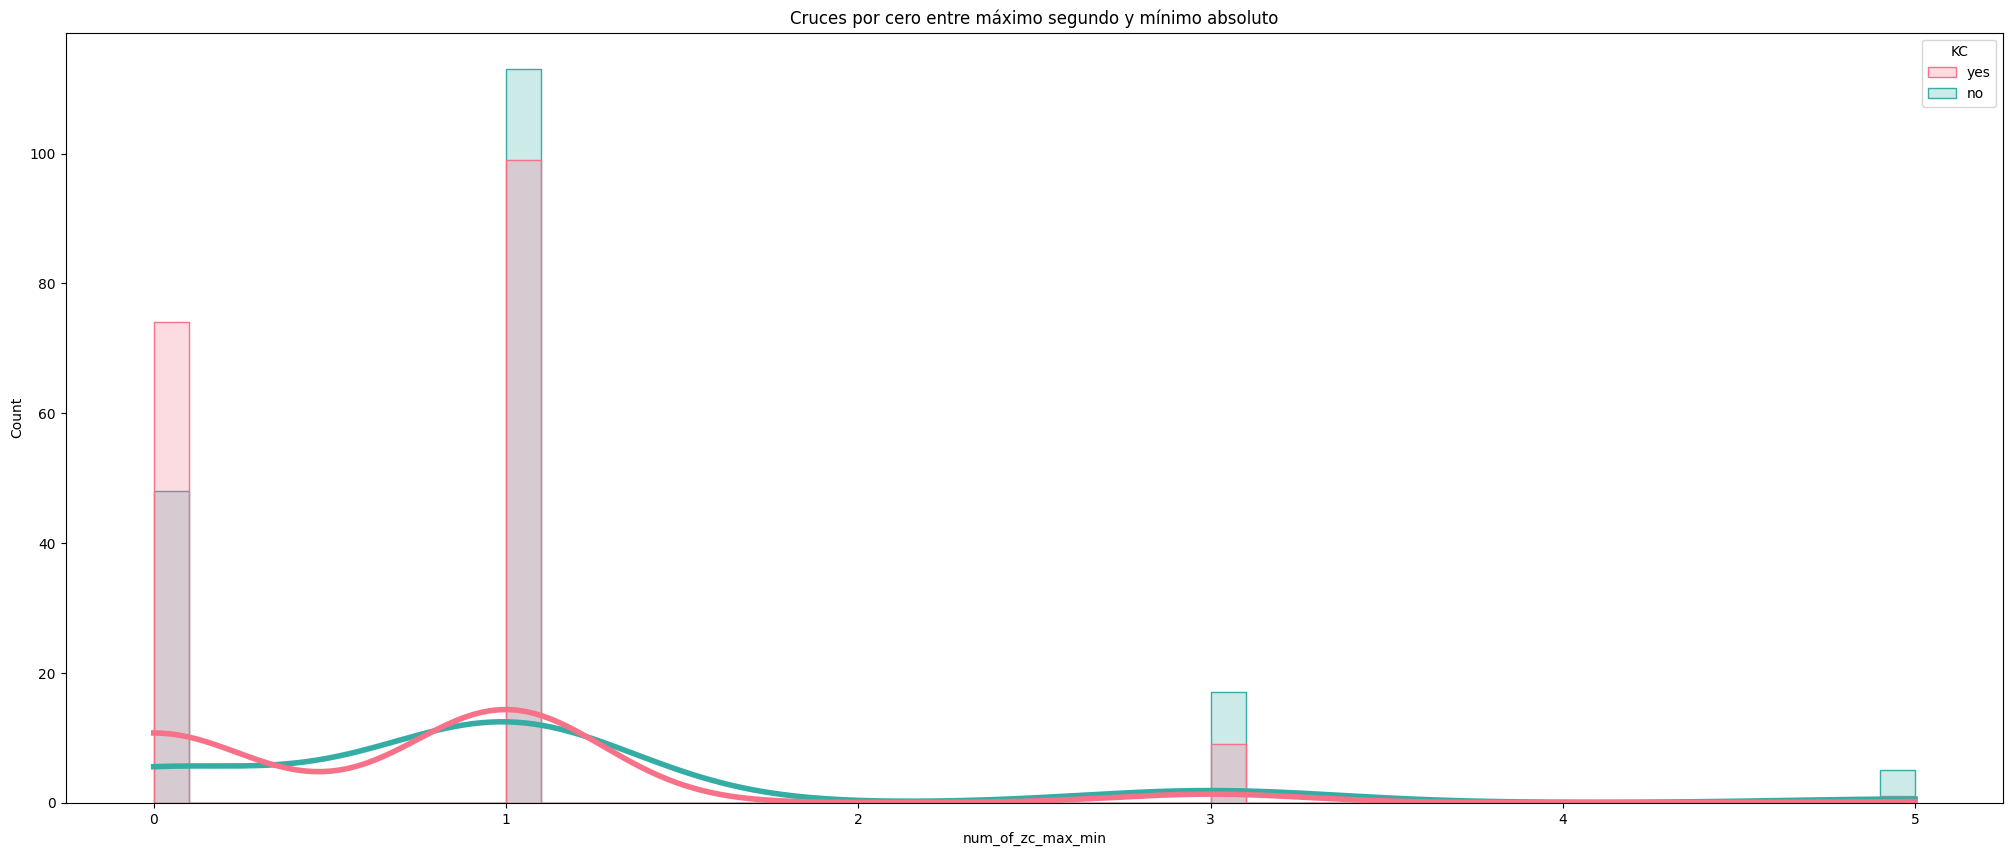

In [28]:
plt.figure(figsize=(25, 10))
sns.histplot(data=df, hue='KC', x='num_of_zc_max_min', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Cruces por cero entre máximo segundo y mínimo absoluto')
plt.rc('legend',fontsize=10)
plt.show()

In [29]:
sns.set_palette('husl')
fig = px.scatter_3d(df, 
                    x='idx_second_maxi', 
                    y='maxi', 
                    z='idx_mini',
                    color='KC',  # Diferenciar por la columna KC
                    size='num_of_zc_min_max',  # Tamaño de los puntos
                    title='Comparación de características más relevantes de la morfología del evento')
print('El tamaño de los puntos indica la cantidad de cruces por cero entre el mínimo y el máximo absoluto')
fig.show()

El tamaño de los puntos indica la cantidad de cruces por cero entre el mínimo y el máximo absoluto


## Datos time locked al  mínimo absoluto

In [30]:
df = df_min.copy()

### Análisis de potencias según KC o no KC

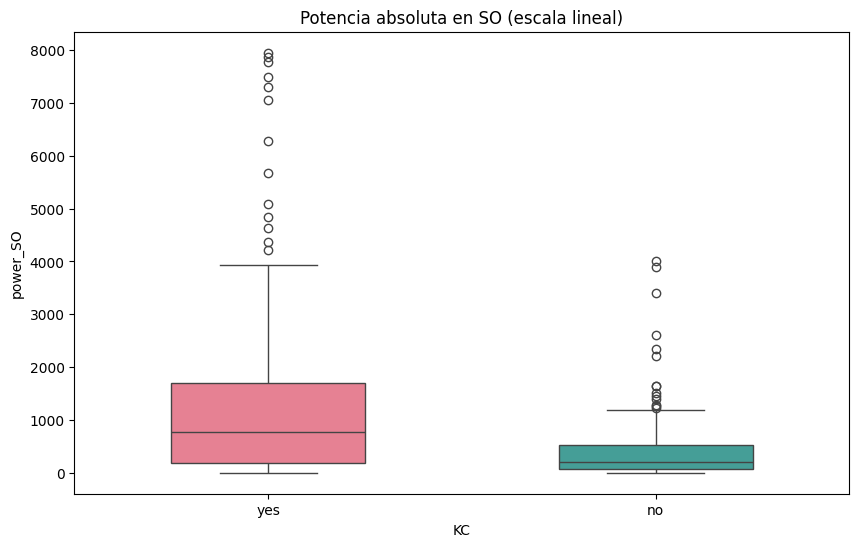

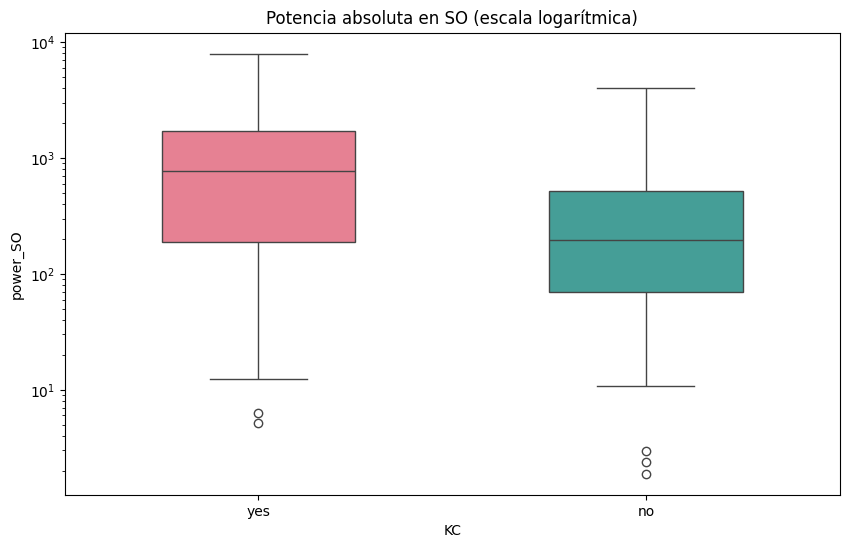

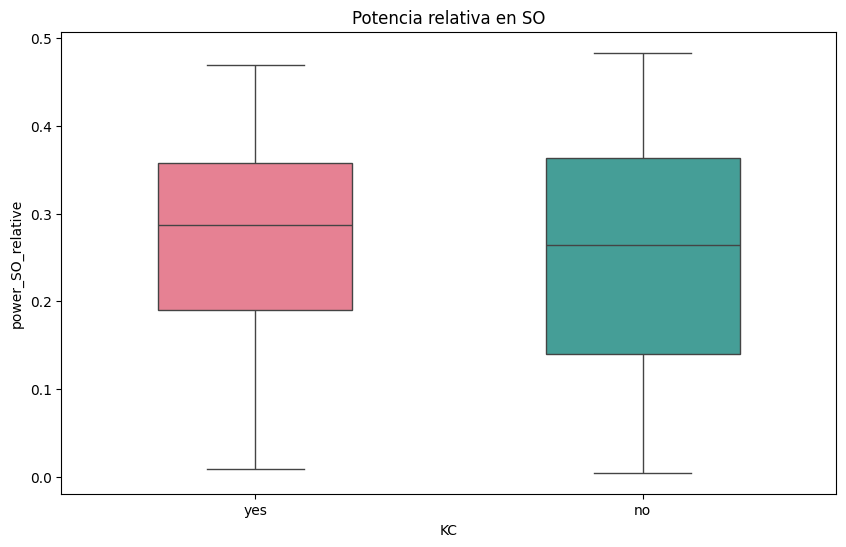

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_SO', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia absoluta en SO (escala lineal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_SO', hue='KC', x='KC', palette='husl', width=0.5, log_scale=True)
plt.title('Potencia absoluta en SO (escala logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_SO_relative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia relativa en SO')
plt.show()

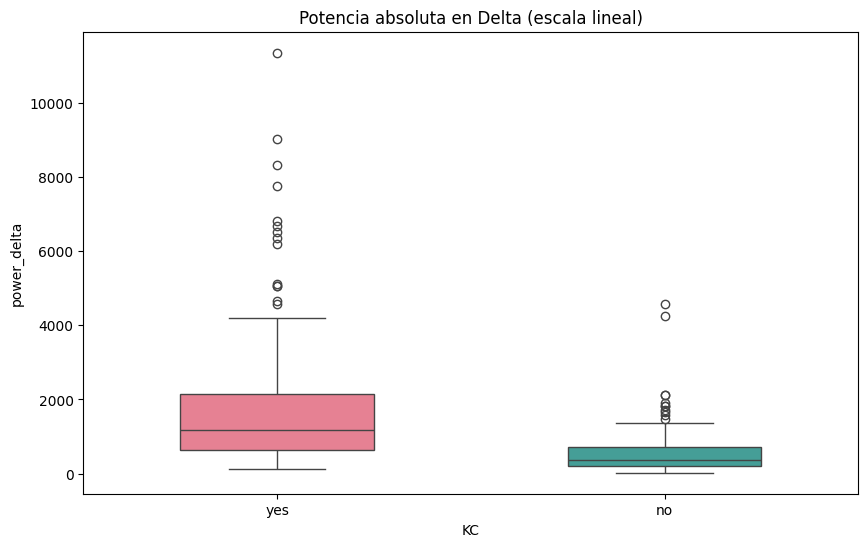

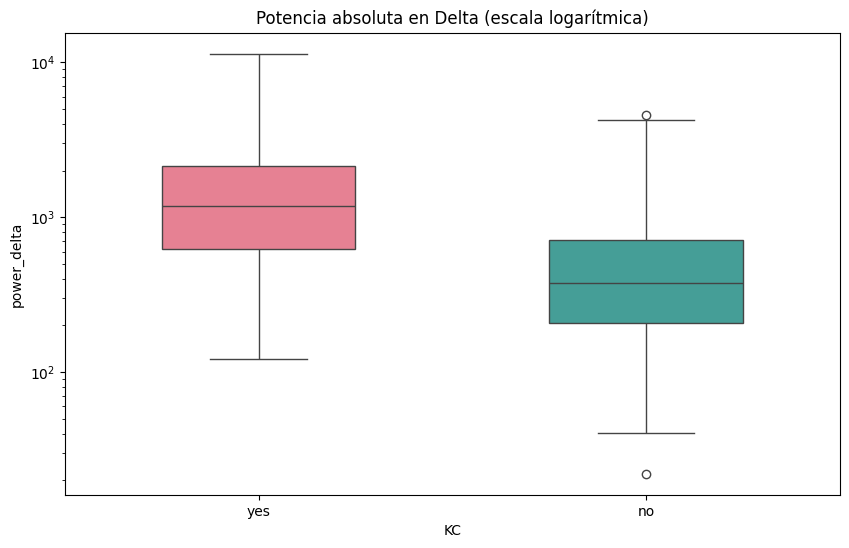

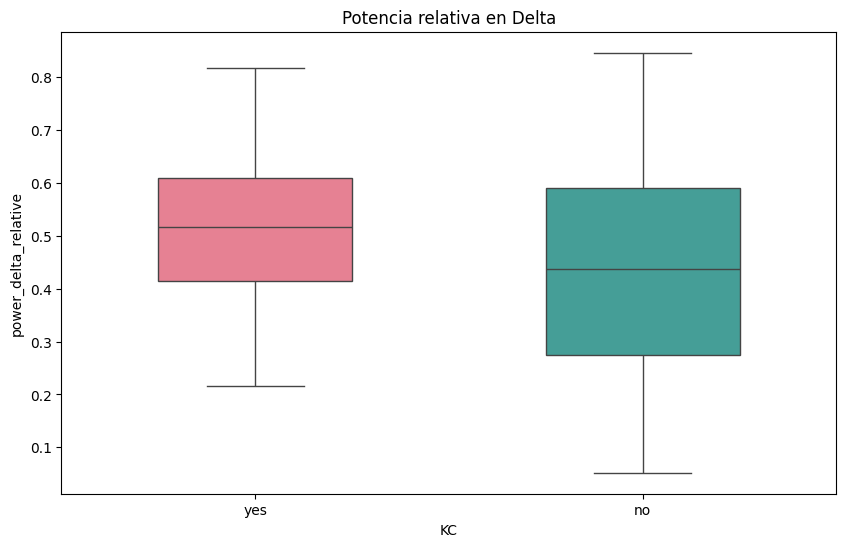

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_delta', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia absoluta en Delta (escala lineal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_delta', hue='KC', x='KC', palette='husl', width=0.5, log_scale=True)
plt.title('Potencia absoluta en Delta (escala logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_delta_relative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia relativa en Delta')
plt.show()

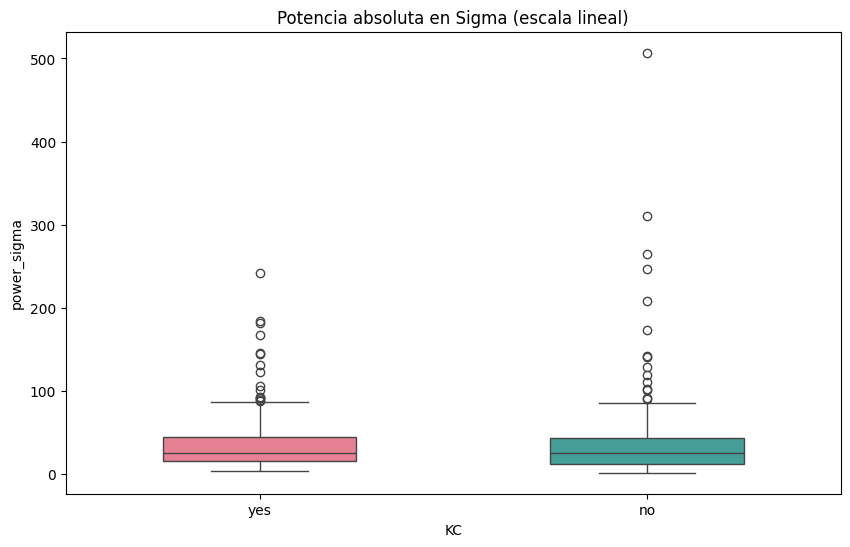

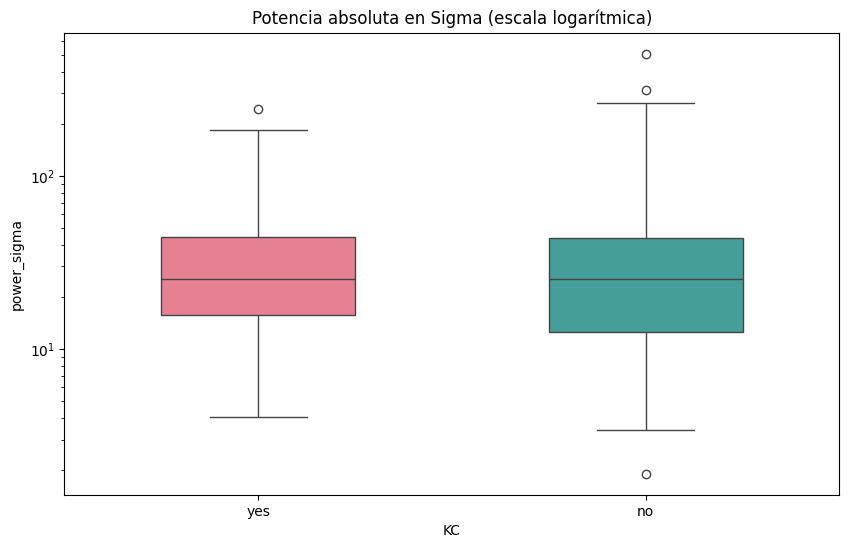

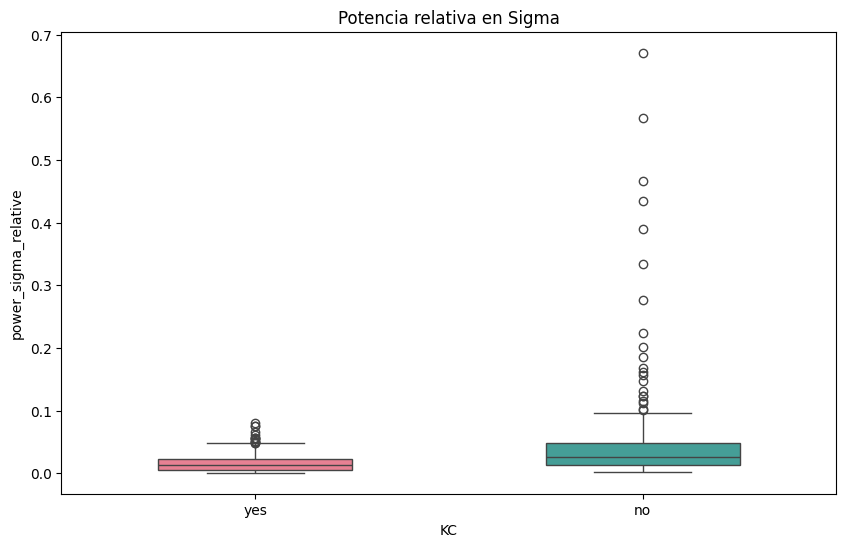

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_sigma', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia absoluta en Sigma (escala lineal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_sigma', hue='KC', x='KC', palette='husl', width=0.5, log_scale=True)
plt.title('Potencia absoluta en Sigma (escala logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='power_sigma_relative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Potencia relativa en Sigma')
plt.show()

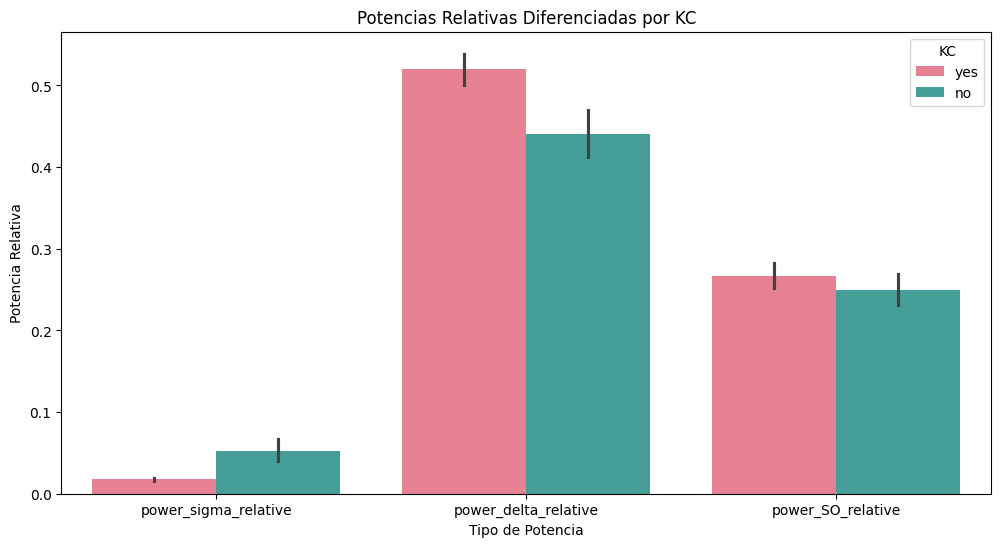

In [34]:
df_melted = df.melt(id_vars=['KC'], value_vars=['power_sigma_relative', 'power_delta_relative', 'power_SO_relative'], 
                    var_name='Power Type', value_name='Relative Power')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Power Type', y='Relative Power', hue='KC', palette='husl')
plt.title('Potencias Relativas Diferenciadas por KC')
plt.xlabel('Tipo de Potencia')
plt.ylabel('Potencia Relativa')
plt.legend(title='KC')
plt.show()

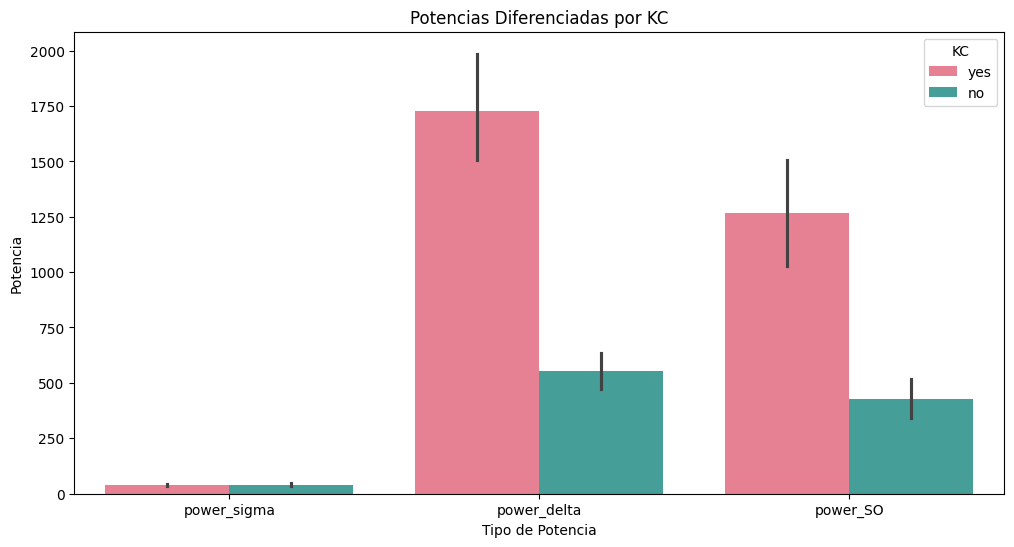

In [35]:
df_melted = df.melt(id_vars=['KC'], value_vars=['power_sigma', 'power_delta', 'power_SO'], 
                    var_name='Power Type', value_name='Power')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Power Type', y='Power', hue='KC', palette='husl')
plt.title('Potencias Diferenciadas por KC')
plt.xlabel('Tipo de Potencia')
plt.ylabel('Potencia')
plt.legend(title='KC')
plt.show()

<Figure size 1000x600 with 0 Axes>

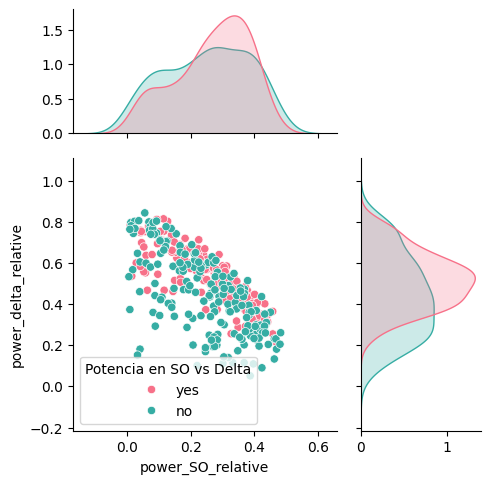

In [36]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df, x='power_SO_relative', y='power_delta_relative', hue='KC', palette='husl', height=5, ratio=2, marginal_ticks=True)
plt.legend(title='Potencia en SO vs Delta')
plt.show()

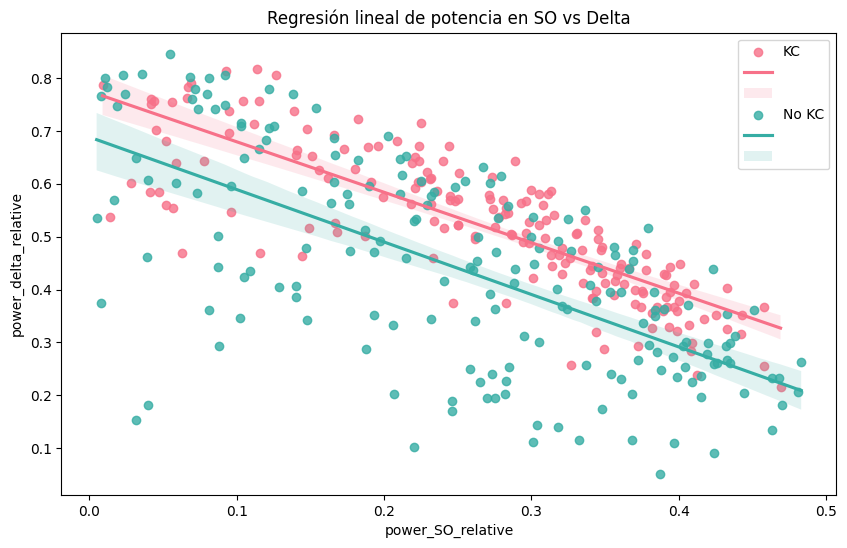

In [37]:
kc_color, nokc_color = sns.color_palette(palette='husl', n_colors=2)
plt.figure(figsize=(10,6))
sns.regplot(data=df[df['KC'] == 'yes'], x="power_SO_relative", y="power_delta_relative", color=kc_color, line_kws=dict(color=kc_color))
sns.regplot(data=df[df['KC'] == 'no'], x="power_SO_relative", y="power_delta_relative", color=nokc_color, line_kws=dict(color=nokc_color))
plt.legend(['KC', '', '', 'No KC', '', ''])
plt.title('Regresión lineal de potencia en SO vs Delta')
plt.show()

<Figure size 1000x600 with 0 Axes>

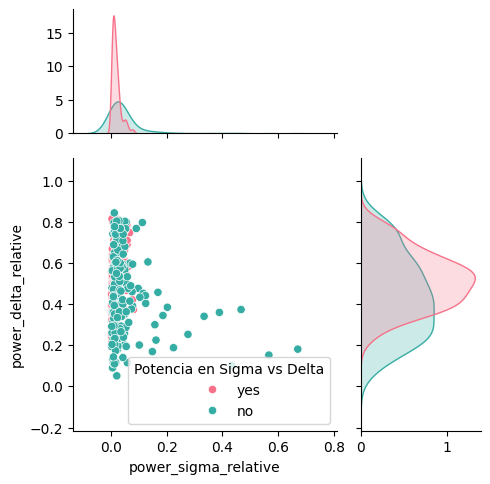

In [38]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='power_sigma_relative', y='power_delta_relative', hue='KC', palette='husl', height=5, ratio=2, marginal_ticks=True)
plt.legend(title='Potencia en Sigma vs Delta')
plt.show()

<Figure size 1000x600 with 0 Axes>

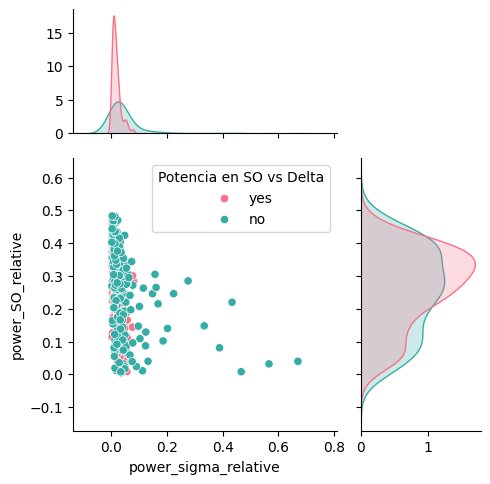

In [39]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='power_sigma_relative', y='power_SO_relative', hue='KC', palette='husl', height=5, ratio=2, marginal_ticks=True)
plt.legend(title='Potencia en SO vs Delta')
plt.show()

In [40]:
df.columns

Index(['power_SO', 'power_SO_relative', 'power_delta', 'power_delta_relative',
       'power_sigma', 'power_sigma_relative', 'maxi', 'idx_maxi', 'mini',
       'idx_mini', 'slope_positive', 'second_maxi', 'idx_second_maxi',
       'slope_negative', 'num_of_zc_min_max', 'num_of_zc_max_min', 'kurtosis',
       'skewness', 'KC'],
      dtype='object')

### Análisis de paramétros estadísticos (kurtosis y skewness)

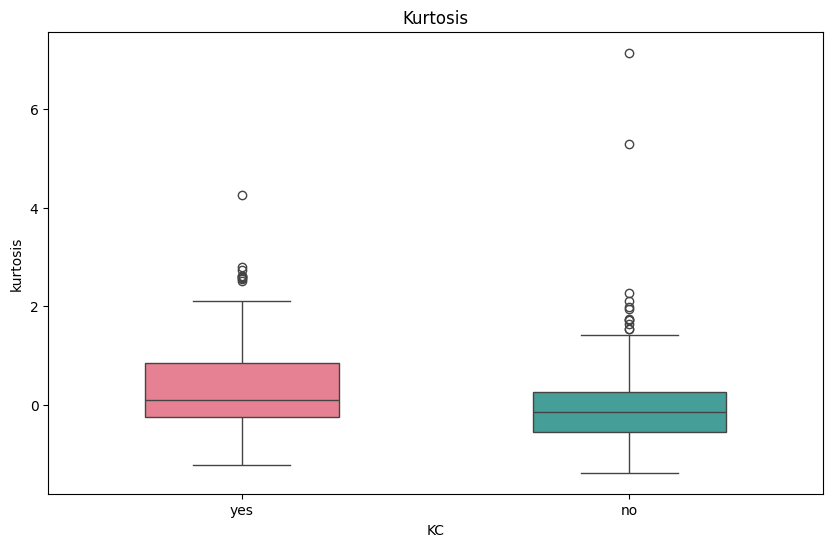

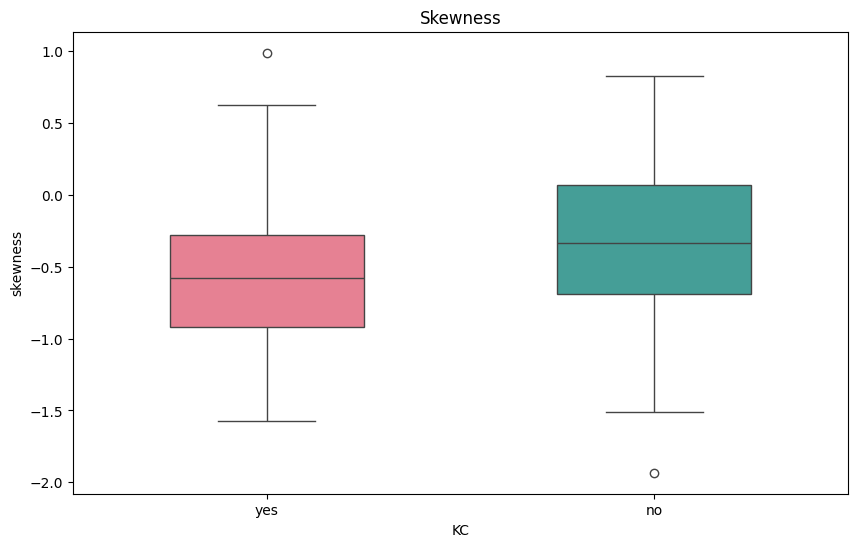

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='kurtosis', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Kurtosis')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='skewness', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Skewness')
plt.show()

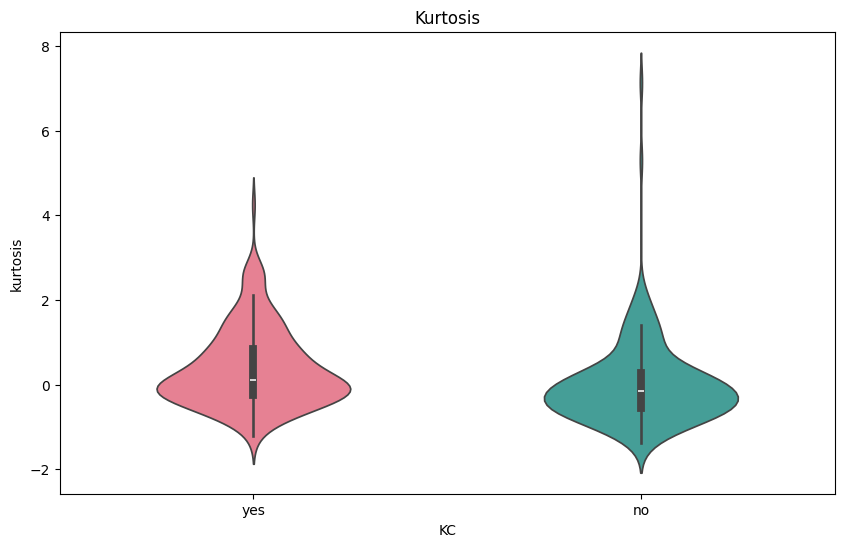

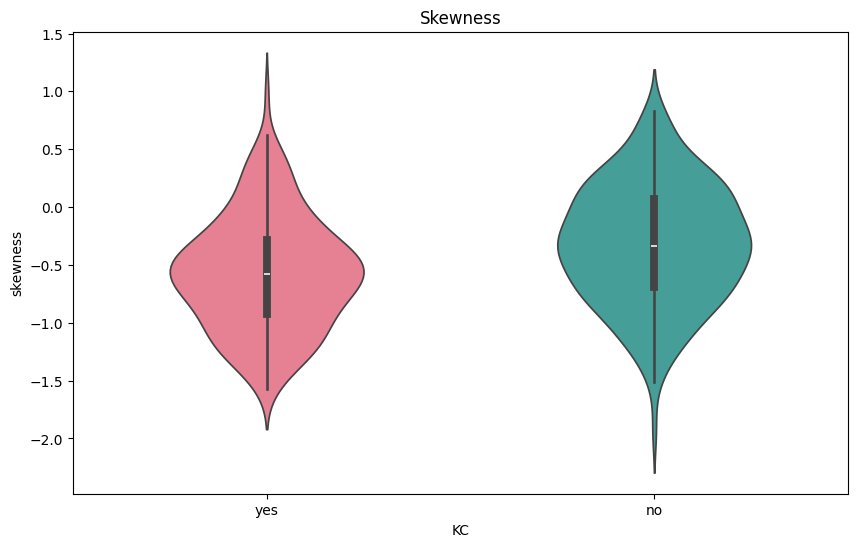

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='kurtosis', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Kurtosis')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='skewness', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Skewness')
plt.show()

### Análisis de características morfológicas del evento

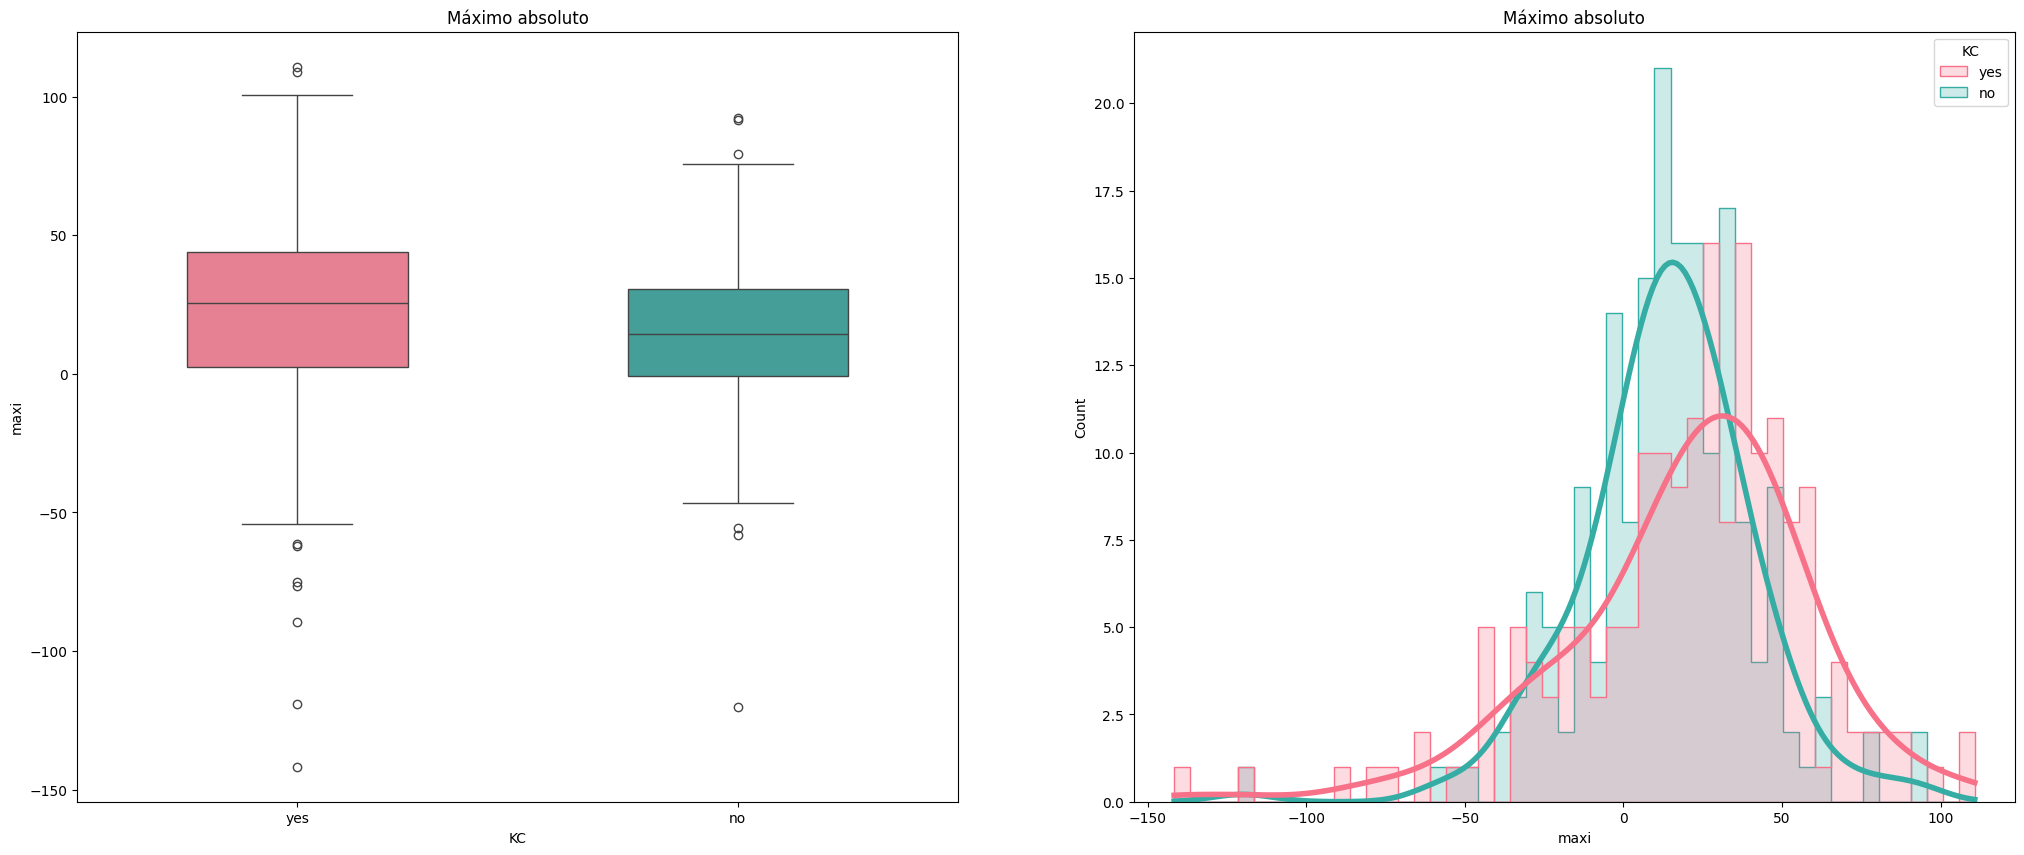

In [43]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Máximo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Máximo absoluto')
plt.show()

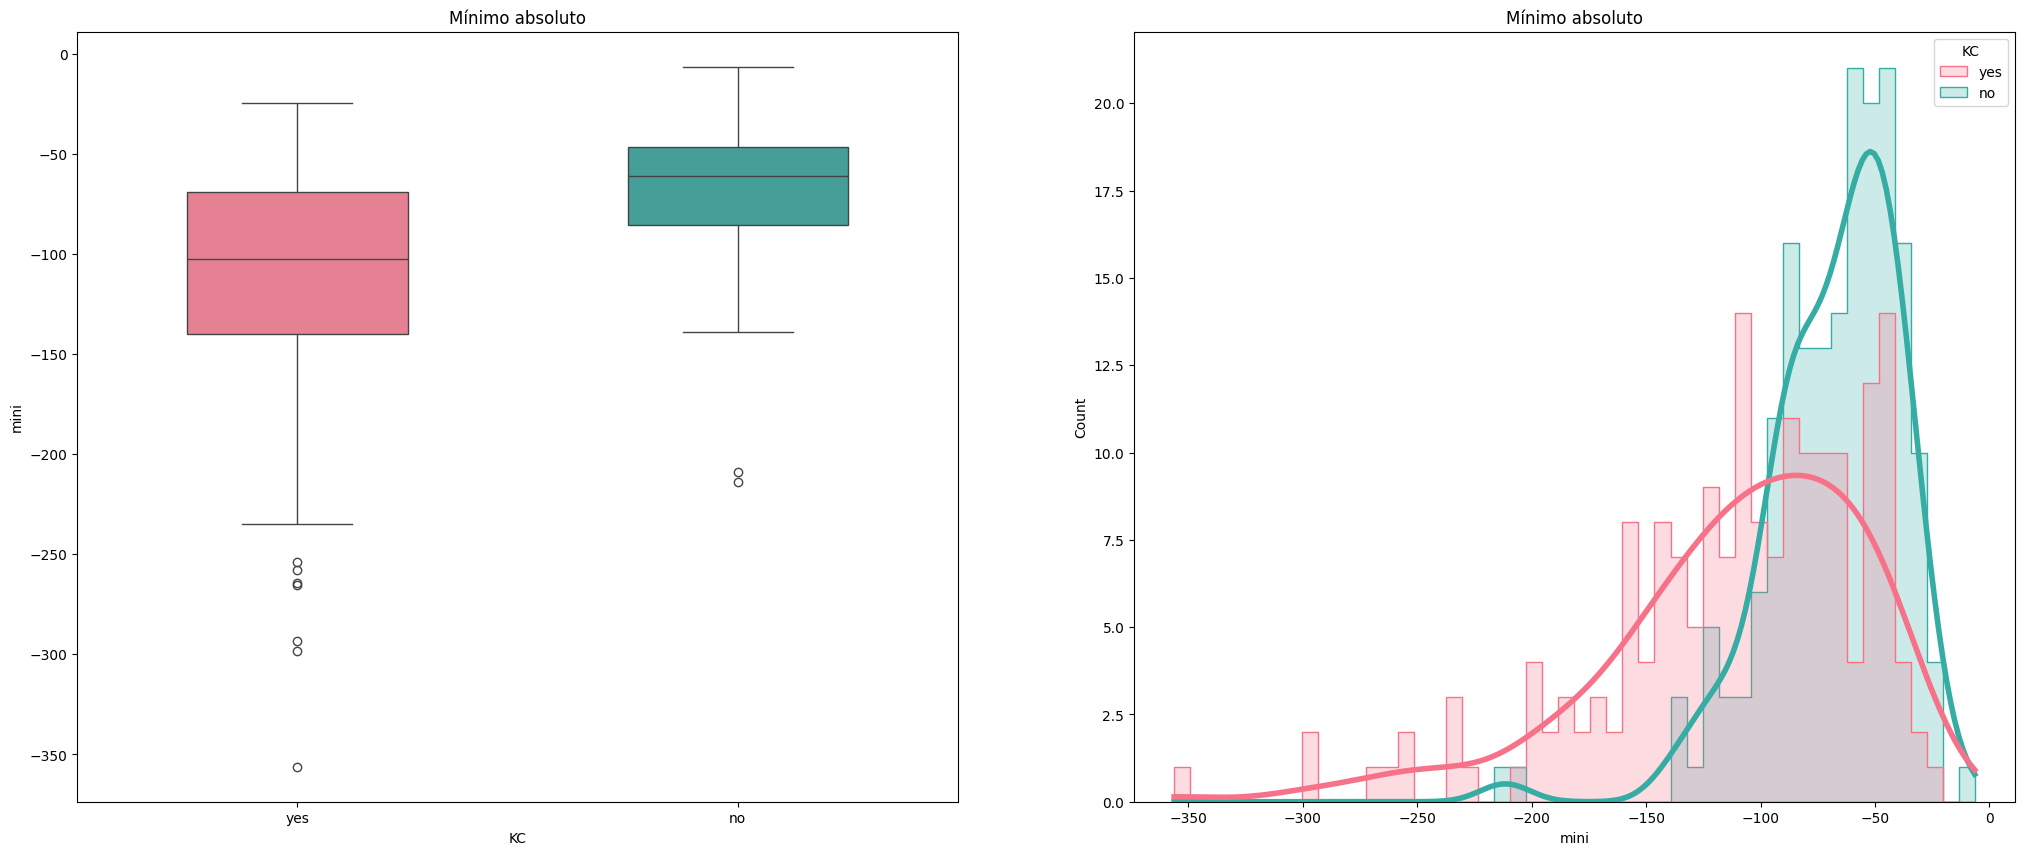

In [44]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='mini', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Mínimo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='mini', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Mínimo absoluto')
plt.show()

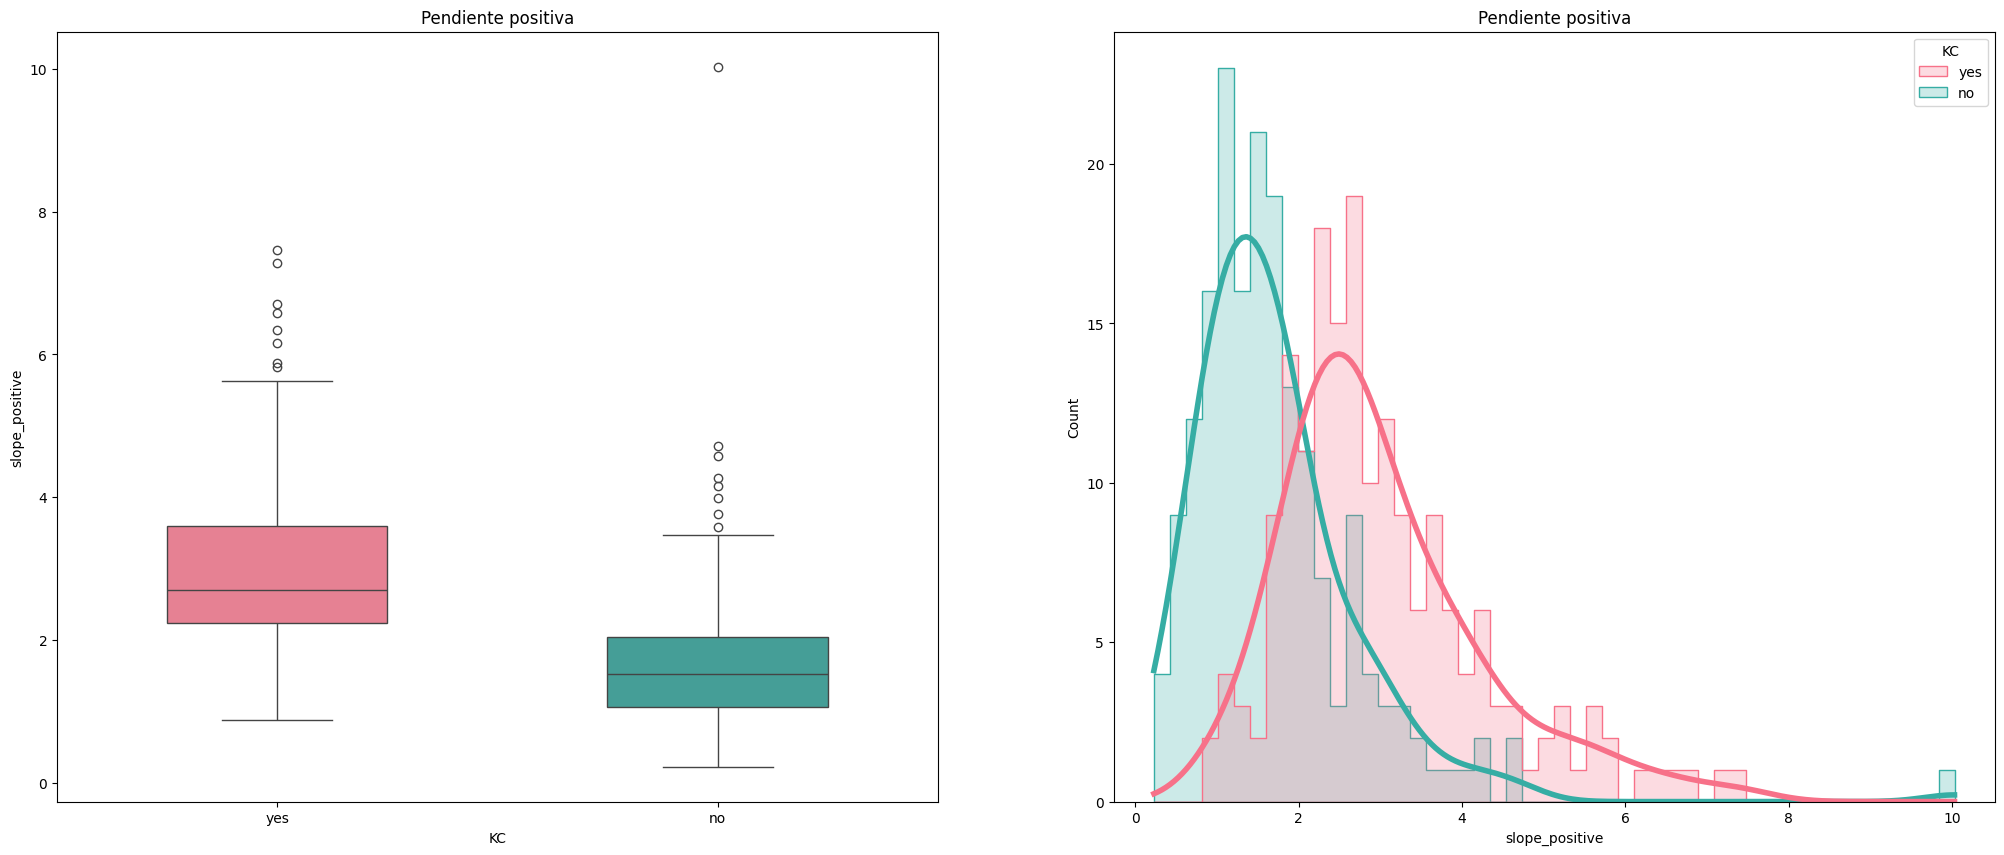

In [45]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='slope_positive', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Pendiente positiva')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='slope_positive', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Pendiente positiva')
plt.show()

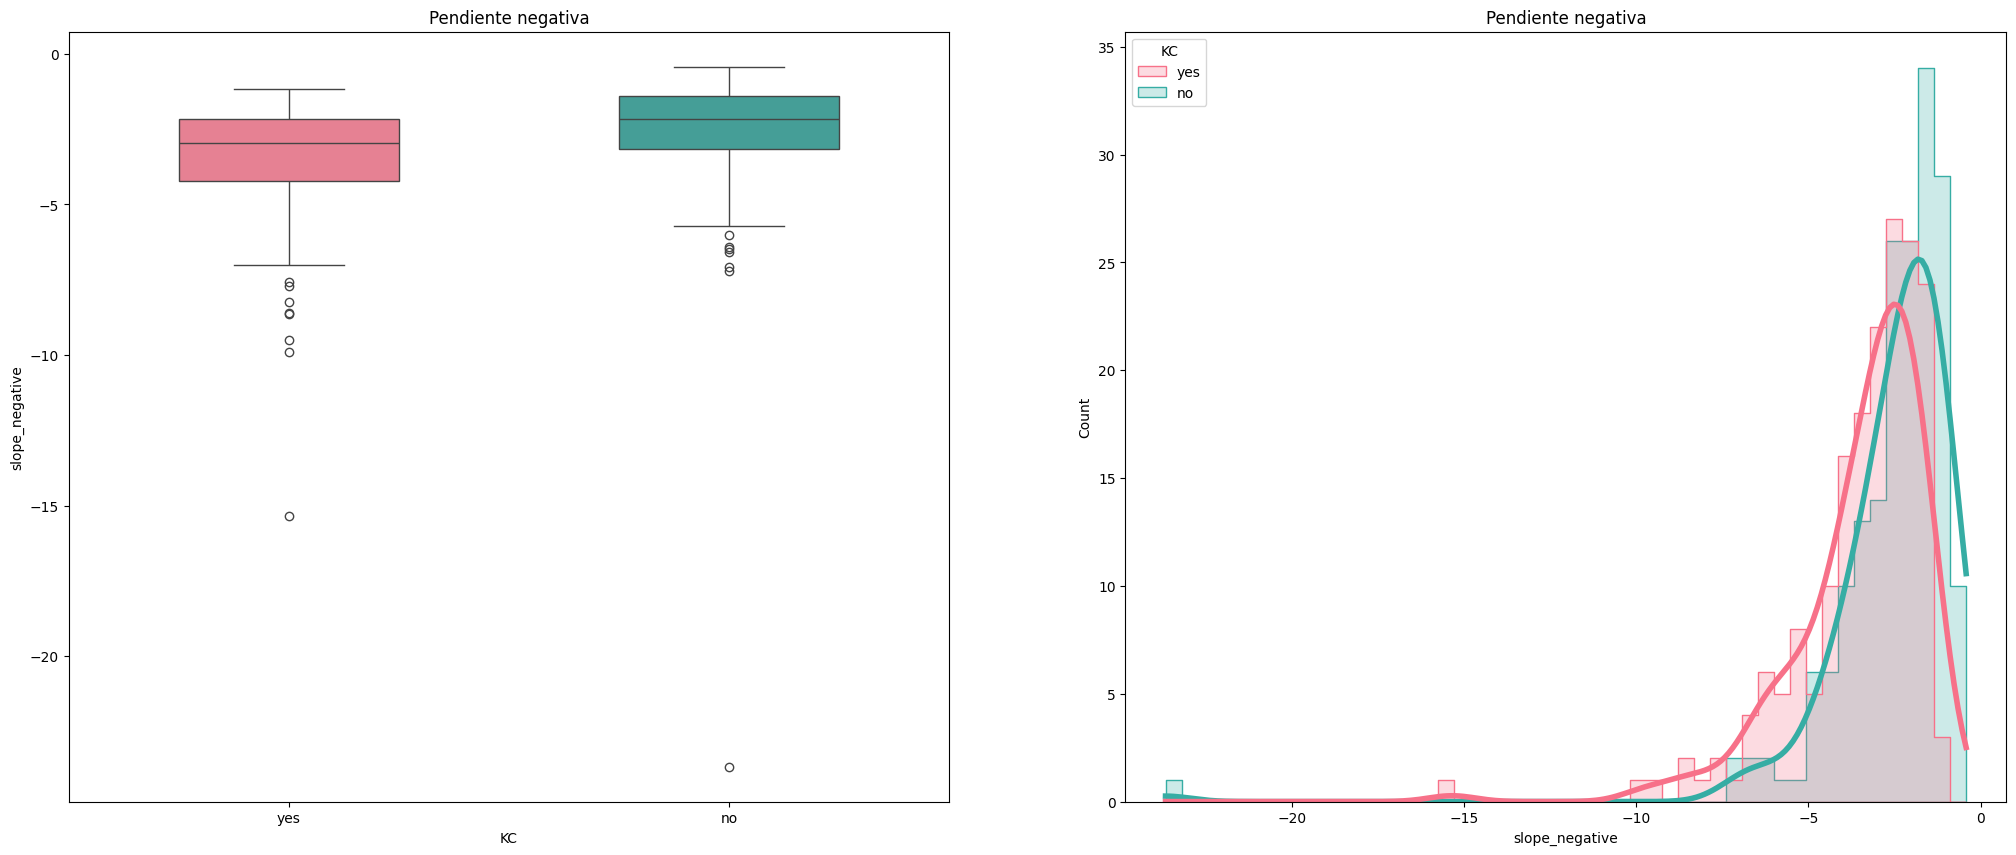

In [46]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='slope_negative', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Pendiente negativa')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='slope_negative', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Pendiente negativa')
plt.show()

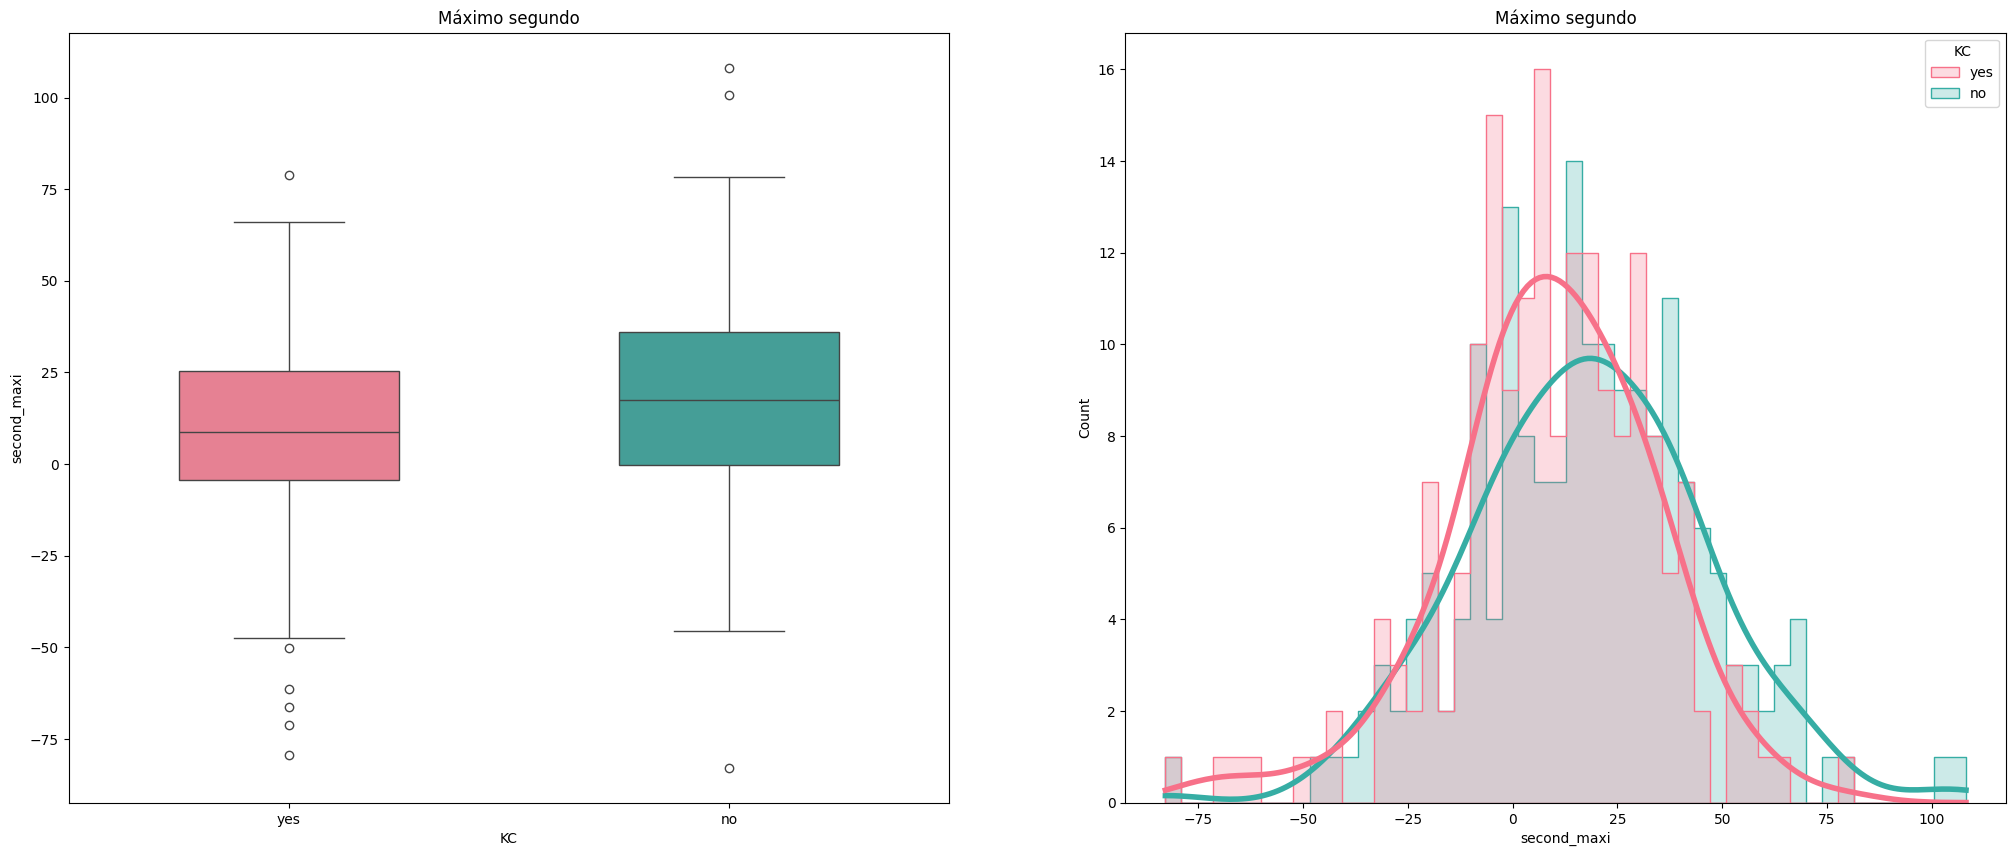

In [47]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='second_maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Máximo segundo')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='second_maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Máximo segundo')
plt.show()

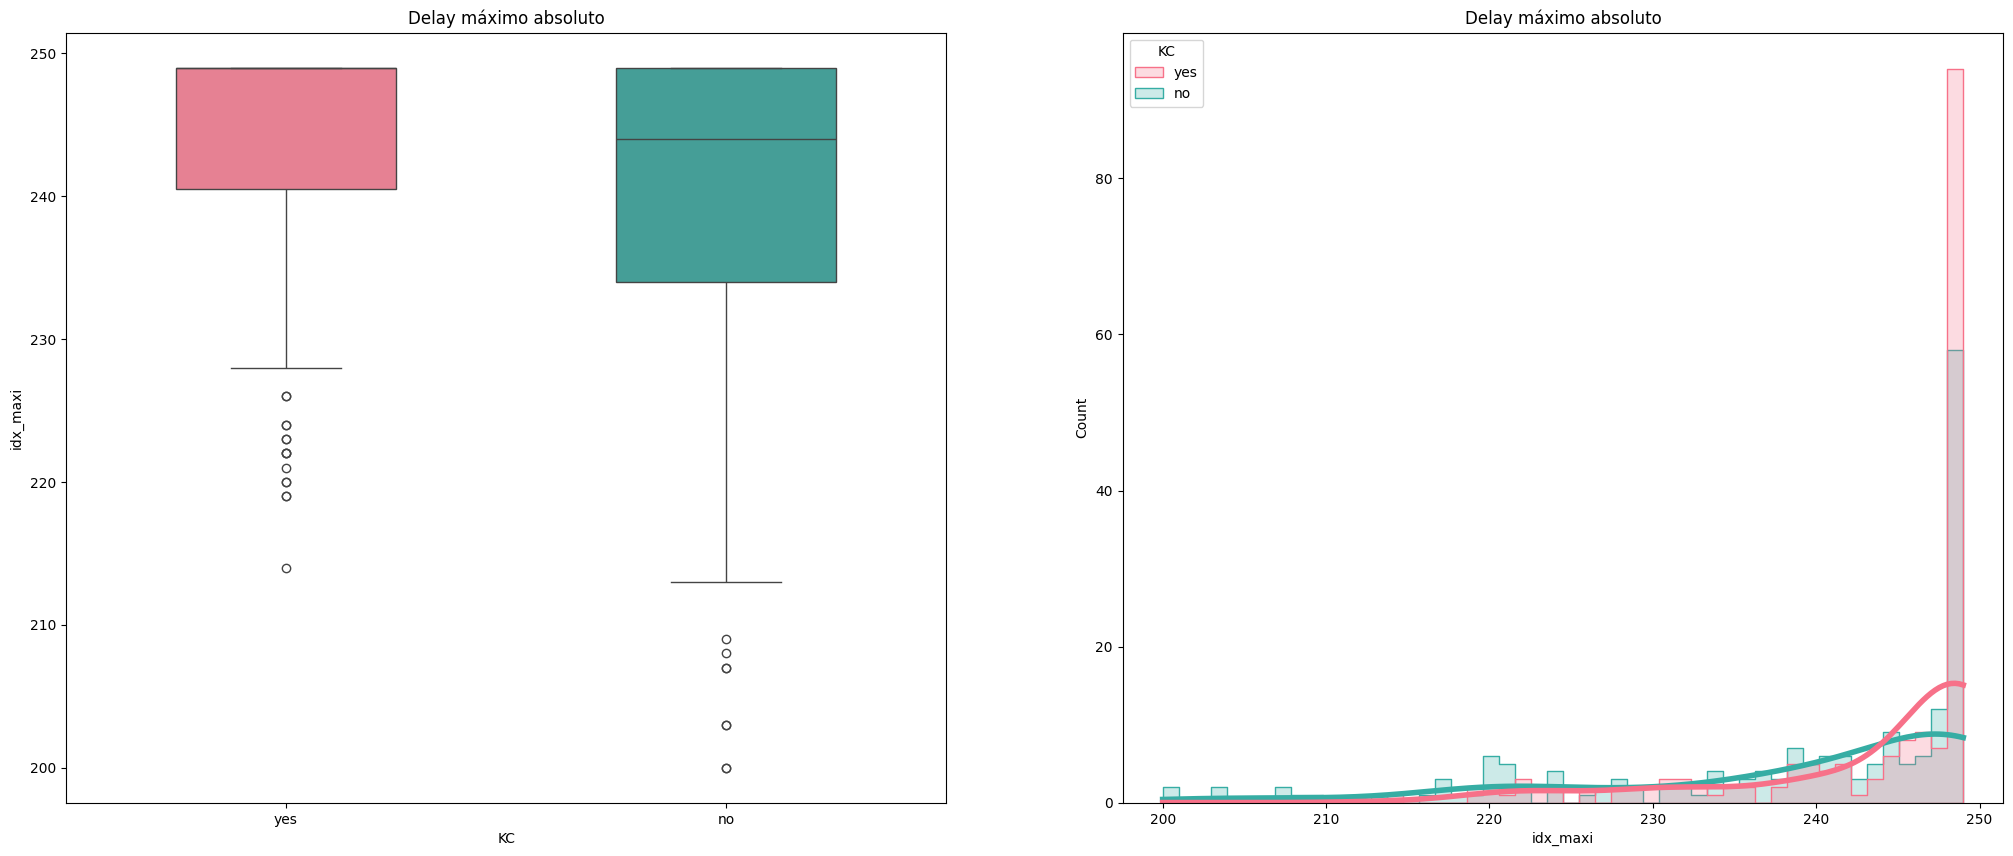

In [48]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='idx_maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Delay máximo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='idx_maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Delay máximo absoluto')
plt.show()

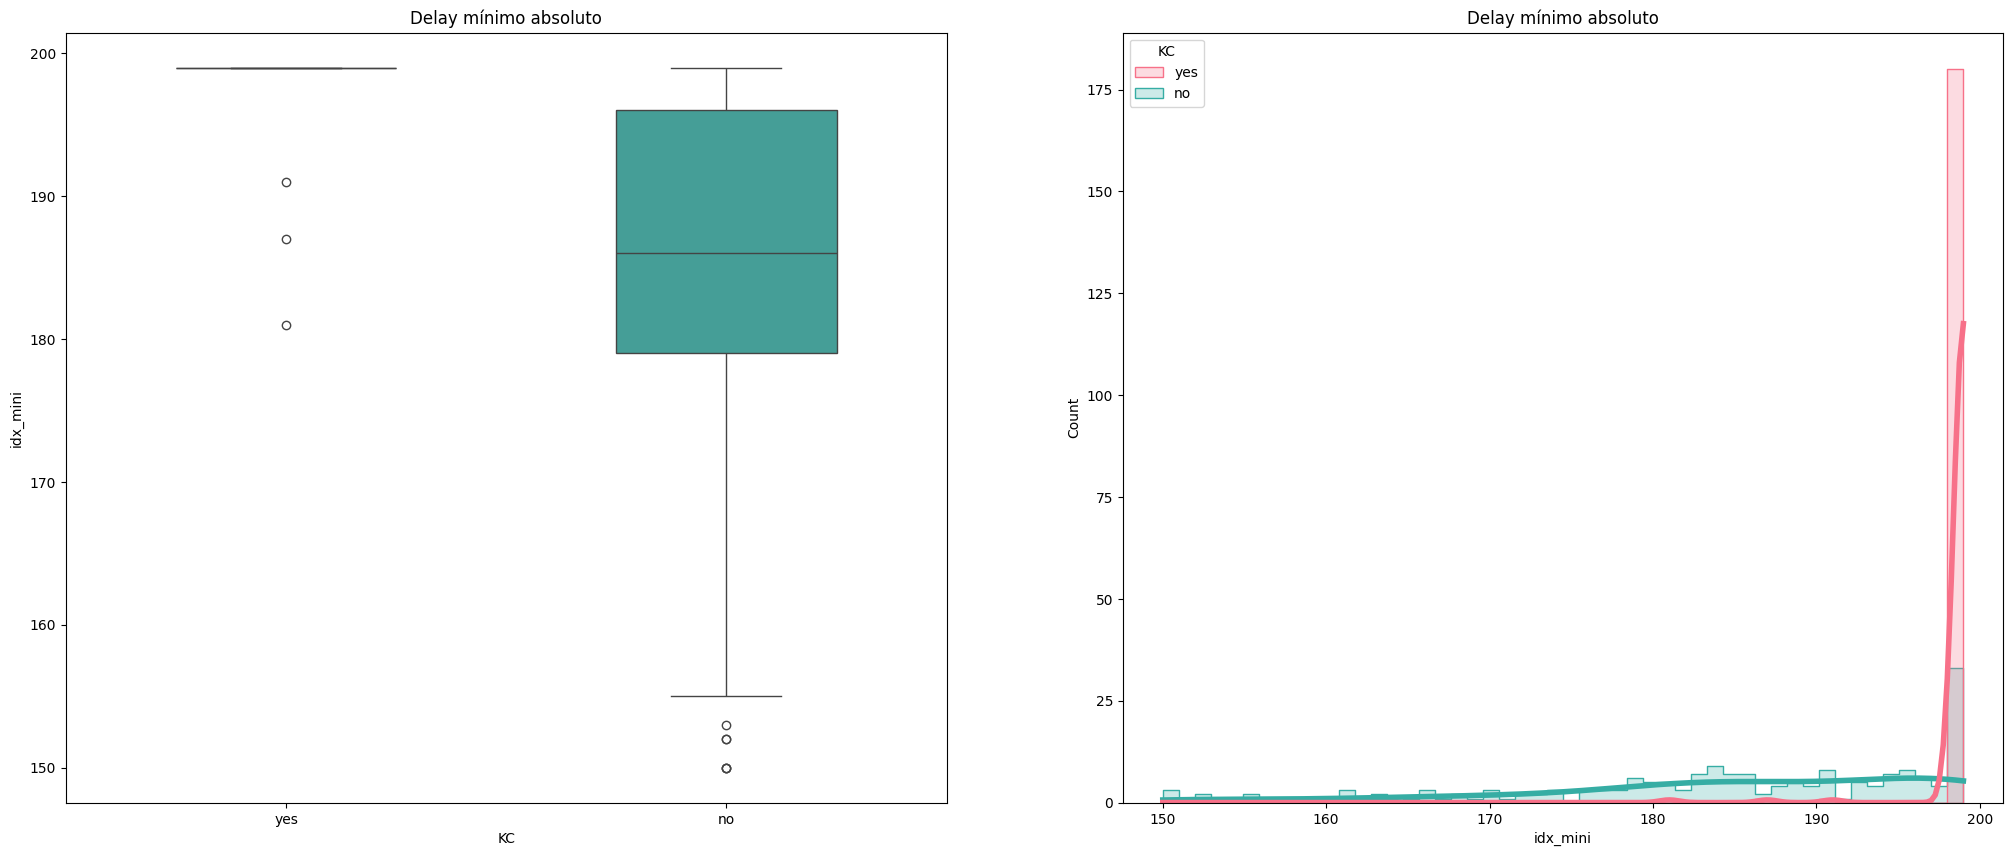

In [49]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='idx_mini', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Delay mínimo absoluto')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='idx_mini', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Delay mínimo absoluto')
plt.show()

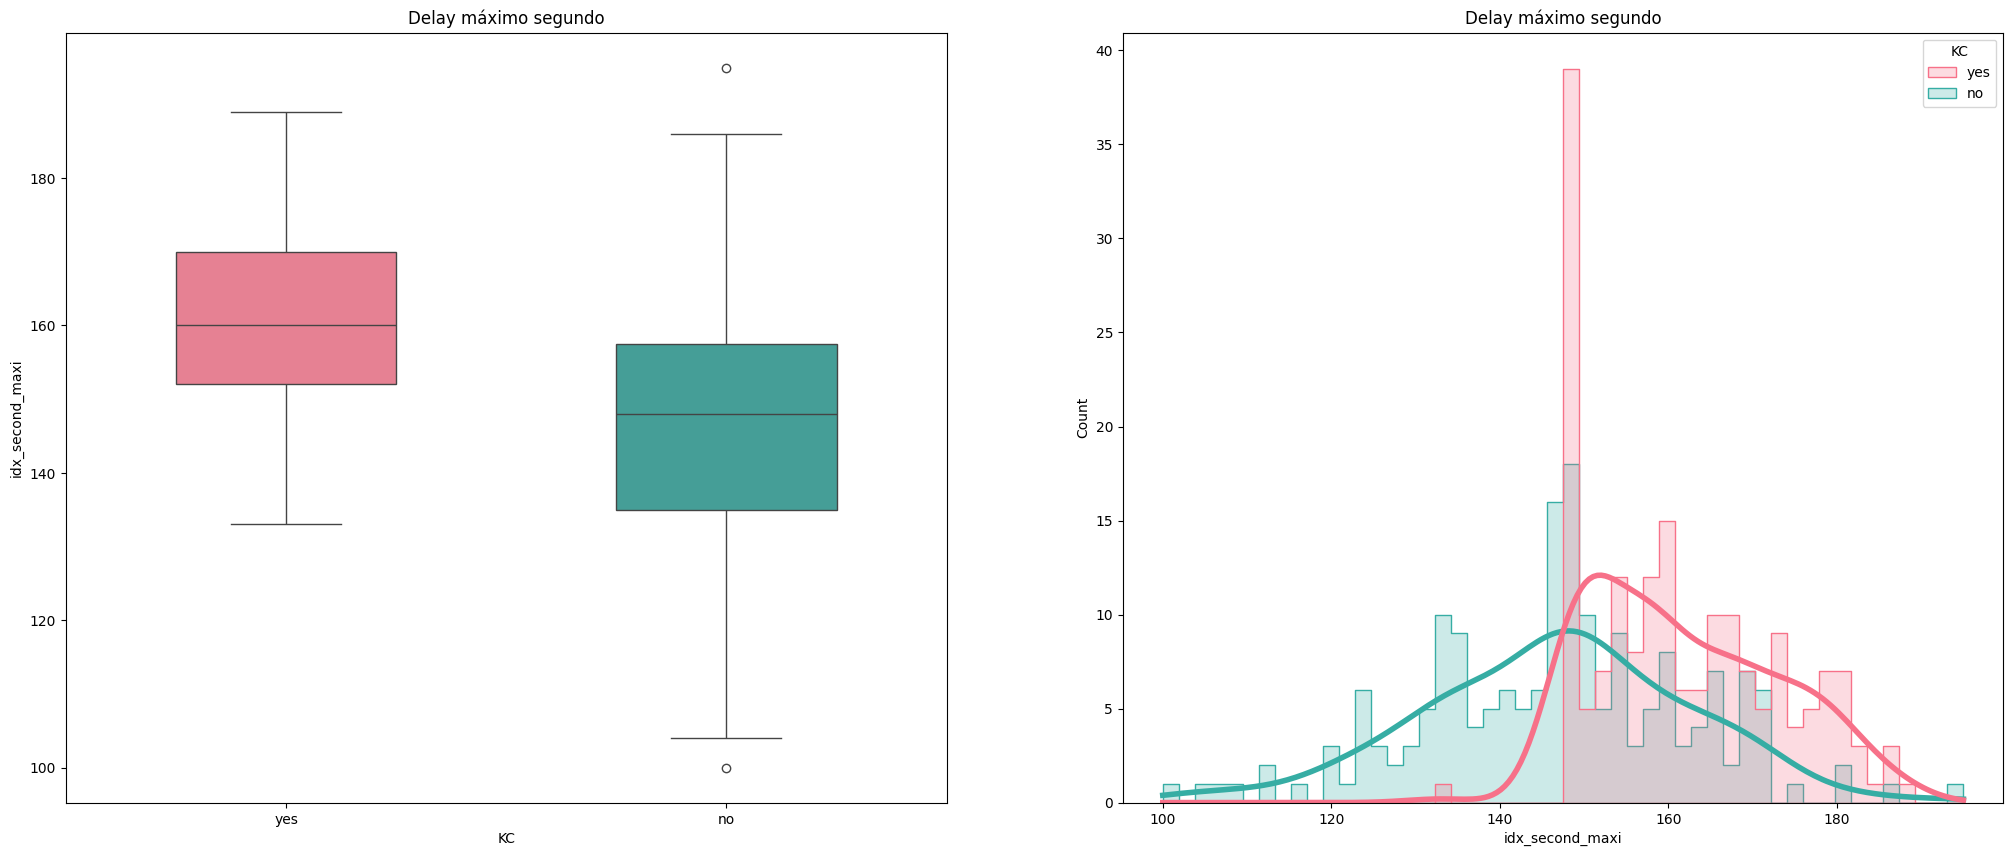

In [50]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='idx_second_maxi', hue='KC', x='KC', palette='husl', width=0.5)
plt.title('Delay máximo segundo')

plt.subplot(1, 2, 2)
sns.histplot(data=df, hue='KC', x='idx_second_maxi', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Delay máximo segundo')
plt.show()

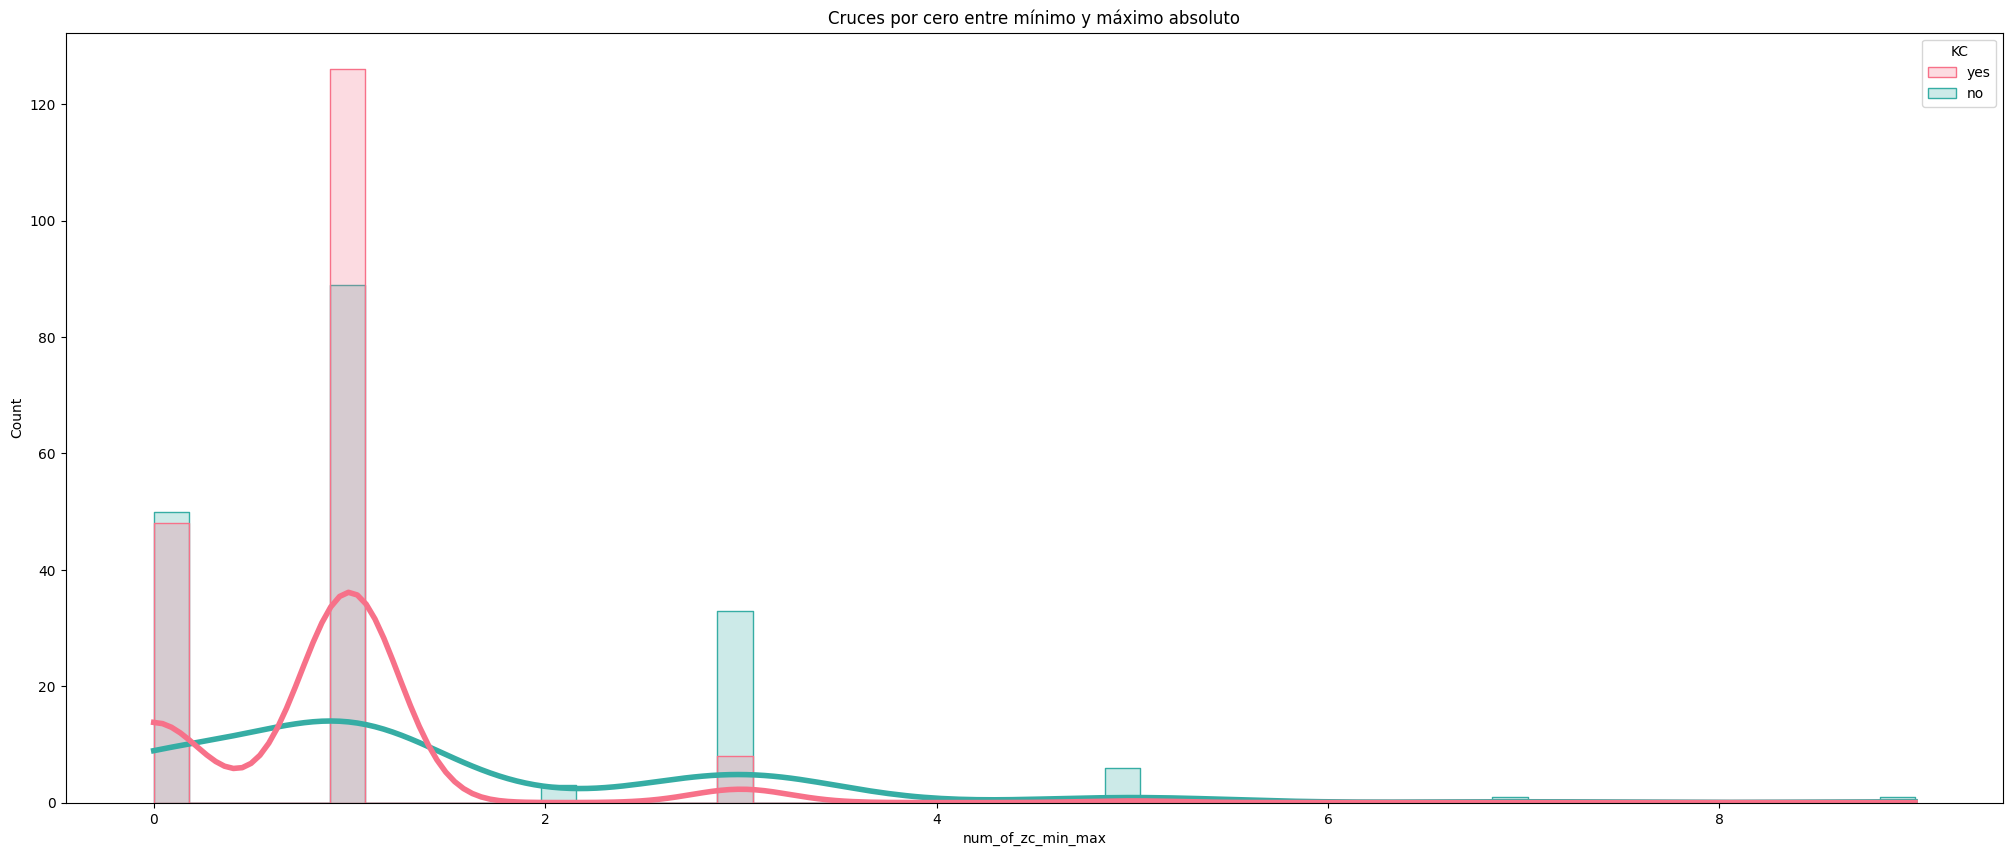

In [51]:
plt.figure(figsize=(25, 10))
sns.histplot(data=df, hue='KC', x='num_of_zc_min_max', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Cruces por cero entre mínimo y máximo absoluto')
plt.rc('legend',fontsize=10)
plt.show()

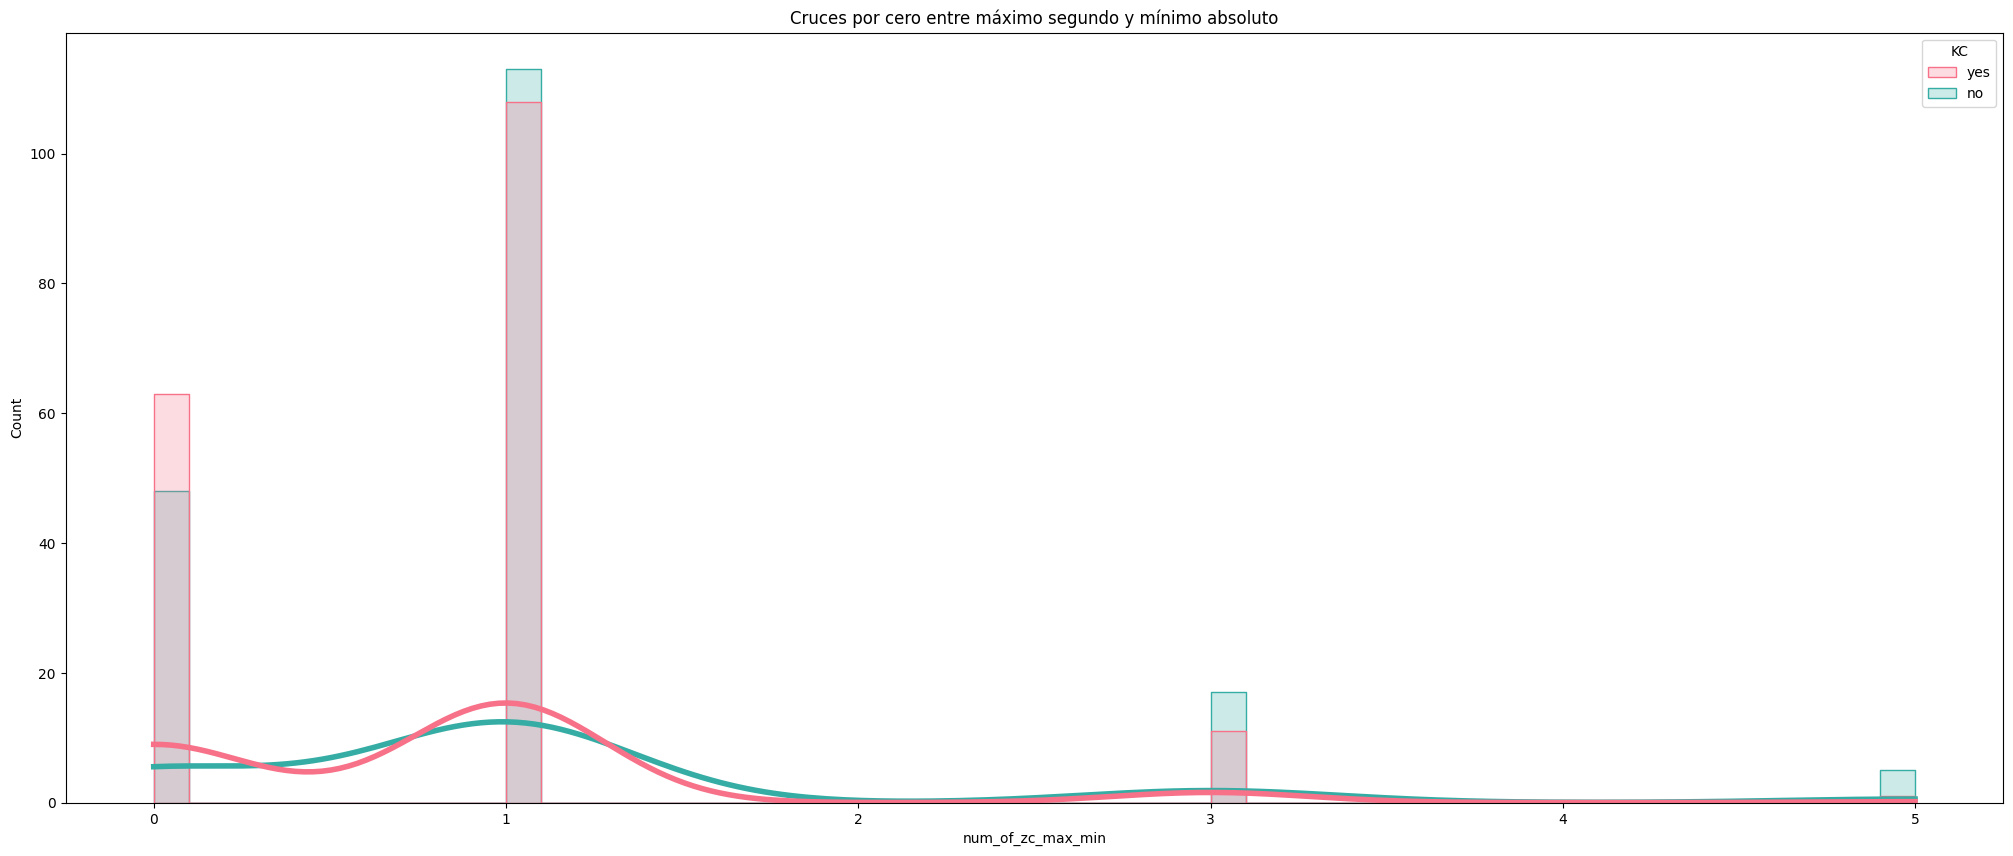

In [52]:
plt.figure(figsize=(25, 10))
sns.histplot(data=df, hue='KC', x='num_of_zc_max_min', palette='husl', kde=True, element='step', bins=50, line_kws={'linewidth': 4})
plt.title('Cruces por cero entre máximo segundo y mínimo absoluto')
plt.rc('legend',fontsize=10)
plt.show()

## Hipnograma

In [66]:
subjects_code = ['ExpS11', 'ExpS12', 'ExpS17', 'ExpS21', 'ExpS28', 'ExpS36', 'ExpS37', 'ExpS40', 'ExpS43', 'ExpS45', 'ExpS66']

In [85]:
scorings = {}
for subject in  subjects_code:
    sc = np.loadtxt(os.path.join('data', f'{subject}_scoring.txt'), delimiter =' ', usecols =(0) )
    sc = [int(x) if x != 4.0 else 3.0 for x in sc]
    scorings[subject] = sc

In [ ]:
for subject in subjects_code:
    plt.figure(figsize=(10, 3))
    hyp = yasa.plot_hypnogram(scorings[subject], highlight='N2', fill_color='whitesmoke')
    plt.tight_layout()
    plt.show()

In [133]:
annotations = {}
for subject in  subjects_code:
    filename=os.path.join('data', f'{subject}_annotations.txt')
    annot = mne.read_annotations(fname=filename, sfreq=200)
    annotations[subject] = annot

In [138]:
KC_onsets= {key:[] for key in subjects_code} #in mins
noKC_onsets = {key:[] for key in subjects_code} #in mins

regex_KC = r"^KC(?:_\w+)?$"
regex_noKC = r"^noKC(?:_\w+)?$"

for subject in subjects_code:
    for annot in annotations[subject]:
        if re.match(regex_KC, annot['description']):
            KC_onsets[subject].append(float(annot['onset']/60))
        elif re.match(regex_noKC, annot['description']):
            noKC_onsets[subject].append(float(annot['onset']/60))

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



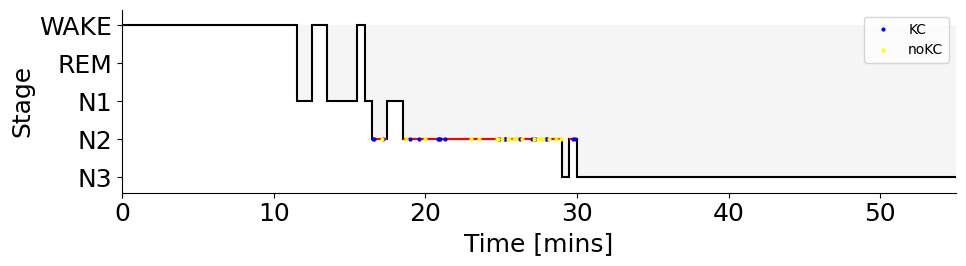

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



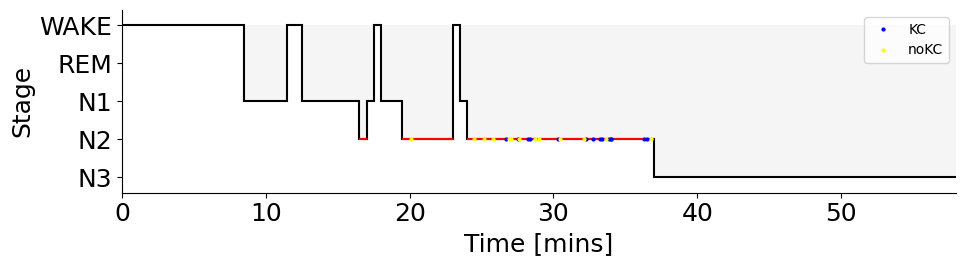

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



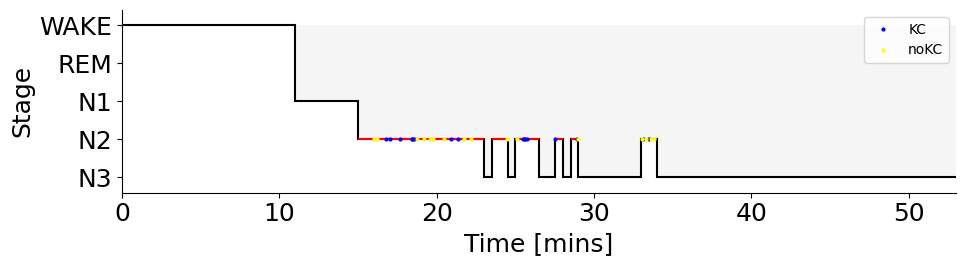

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



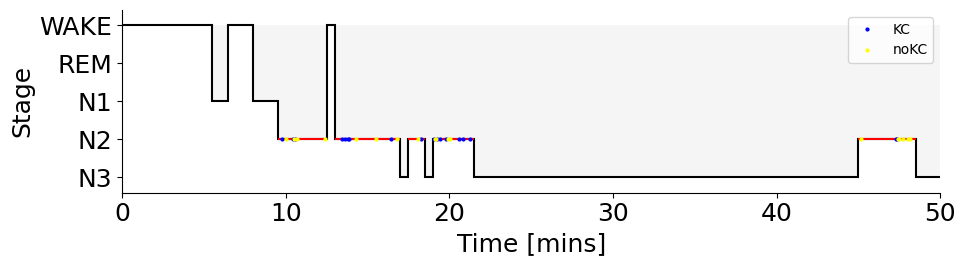

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



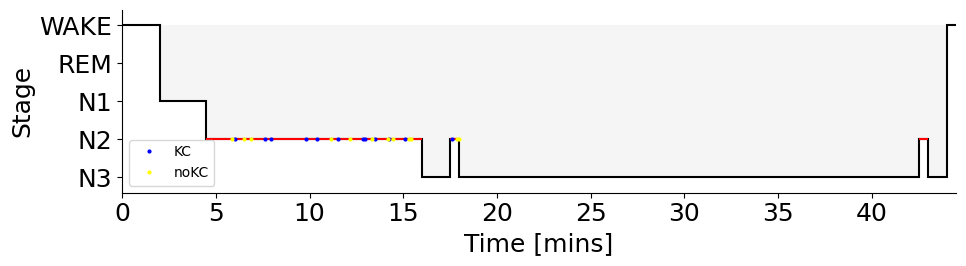

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



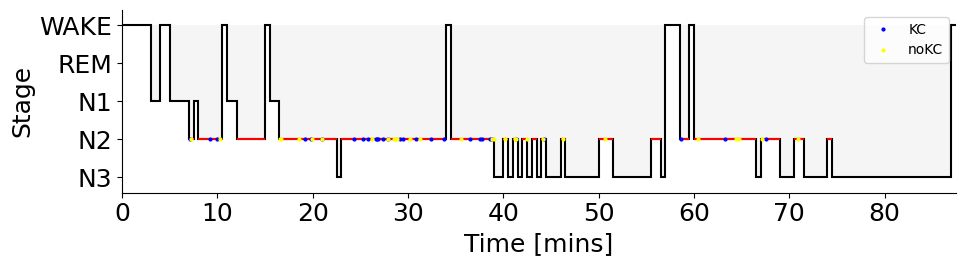

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



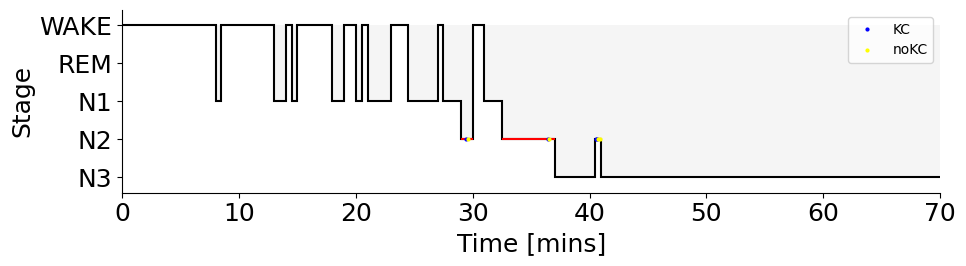

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



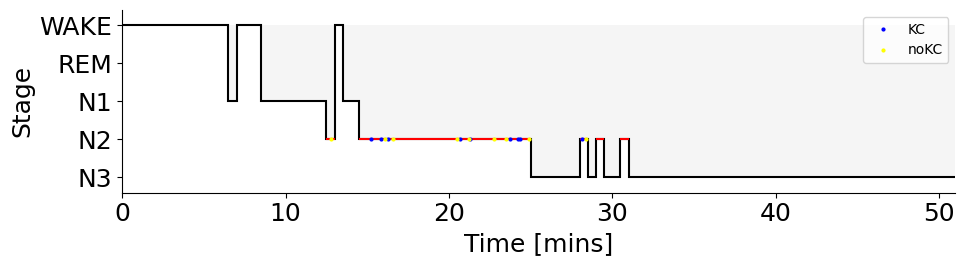

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



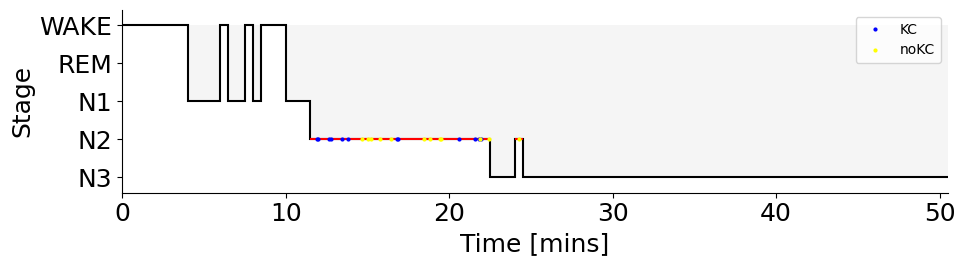

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



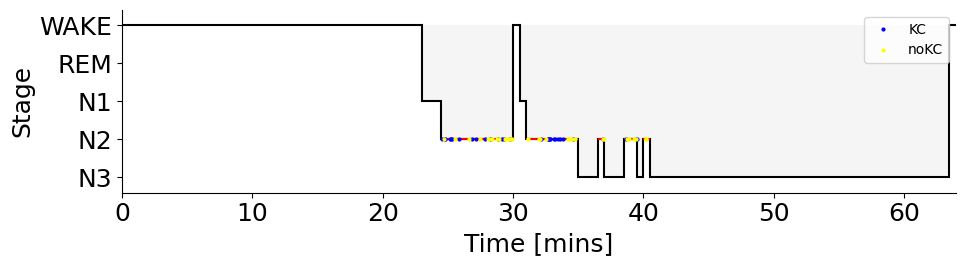

/home/lsym/.venvs/kc_detect_venv/lib/python3.10/site-packages/yasa/plotting.py:89: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.



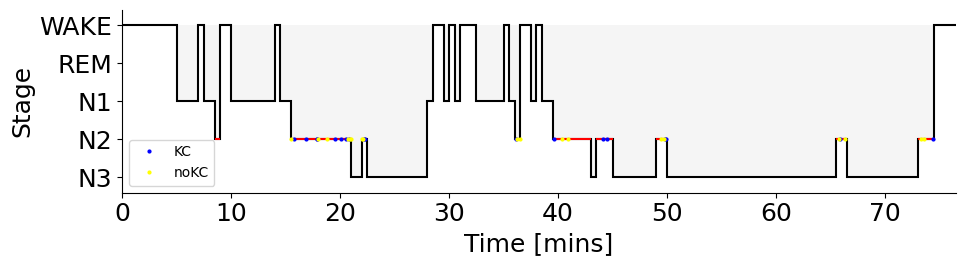

In [158]:
for subject in subjects_code:
    plt.figure(figsize=(10, 3))
    hyp = yasa.plot_hypnogram(scorings[subject], highlight='N2', fill_color='whitesmoke')
    plt.plot(KC_onsets[subject], np.ones_like(KC_onsets[subject]), 'o', label='KC', markersize=2, color='blue')
    plt.plot(noKC_onsets[subject], np.ones_like(noKC_onsets[subject]), 'o', label='noKC', markersize=2, color='yellow')
    plt.legend()
    plt.tight_layout()
    plt.show()